In [85]:
import os
import numpy as np
import pandas as pd
from astropy.time import Time
import matplotlib.pyplot as plt 

preclass_path = os.path.join(
    os.getcwd(), 
    "private-data", 
    "Astronomy+Majors+Pre-class+Questionnaire_April+7,+2025_12.15.csv"
)

postclass_path = os.path.join(
    os.getcwd(), 
    "private-data", 
    #"Astronomy+Majors+Post-class+Questionnaire_April+7,+2025_12.42.csv"
    "Astronomy+Majors+Post-class+Questionnaire_April+17,+2025_16.19.csv"
)

In [40]:
# read in the preclass results
preclass_results_messy = pd.read_csv(preclass_path, skiprows=[1,2])

# first clean up the preclass_results
start_date = np.array([Time(t, format="iso") for t in preclass_results_messy.StartDate])
filter_date = Time("2025-03-24", format="iso") # filter out from the Wednesday before

# filter out
# 1) Test responses from Ed
# 2) The one test response from Lillian (who isn't in the class) 
# Based on visual inspection, this cuts out all of the test responses that are not real
preclass_filter = np.where((start_date > filter_date) * (preclass_results_messy.P0Q1 != "lillianpayette"))[0]

preclass_results = preclass_results_messy.iloc[preclass_filter]

preclass_results = preclass_results.dropna(axis=1, how="all")
preclass_results.P0Q1 = preclass_results.P0Q1.str.strip()
preclass_results.P0Q1 = preclass_results.P0Q1.str.replace("@arizona.edu", "")
preclass_results.P0Q1 = preclass_results.P0Q1.str.replace("@gmail.com", "")
preclass_results.P0Q1 = preclass_results.P0Q1.str.lower()

preclass_results.columns = [c+"_pre" for c in preclass_results.columns]

# preclass_results

In [41]:
postclass_results_messy = pd.read_csv(postclass_path, skiprows=[1,2])

start_date = np.array([Time(t, format="iso") for t in postclass_results_messy.StartDate])
filter_date = Time("2025-03-31", format="iso")

# filter out anything before the filter_date
postclass_filter = np.where(start_date > filter_date)[0]

postclass_results = postclass_results_messy.iloc[postclass_filter]
postclass_results = postclass_results.dropna(axis=1, how="all")
postclass_results.P0Q1 = postclass_results.P0Q1.str.strip()
postclass_results.P0Q1 = postclass_results.P0Q1.str.replace("@arizona.edu", "")
postclass_results.P0Q1 = postclass_results.P0Q1.str.replace("@gmail.com", "")
postclass_results.P0Q1 = postclass_results.P0Q1.str.lower()

postclass_results.columns = [c+"_post" for c in postclass_results.columns]

postclass_results.P0Q1_post

3          amcmillon
4       jeremyshanks
5          andyrohde
6        adityaghosh
7        chloebillet
8             mitulh
9       greciaaboyte
10     coqueblanquer
11          kylefisk
12        briannat33
13       lilybeenken
14       saifnaser22
15      arunchebrolu
16          23798812
17     ryderthompson
18          ksmith13
19          23919743
20         sgmamrick
21    kmariftushar27
22      carsonasmith
23          23888809
24    marwangaasande
25       ameliawynne
26     jessicaaguayo
27       andersonava
28    scarlettbolton
29            nkanno
30            alofty
32          23922048
33          23884594
34       arnpriester
35      lennydruelle
36            alofty
37            arushg
38           fyilmaz
Name: P0Q1_post, dtype: object

In [53]:
results["Q26_post"]

0                    NaN
1     IM_3dYeDHWRXZEHhL8
2     IM_9MlBVmJgUuu4p4q
3     IM_3dYeDHWRXZEHhL8
4     IM_0JSGGyyK8hsclIW
5     IM_3dYeDHWRXZEHhL8
6     IM_3dYeDHWRXZEHhL8
7     IM_9MlBVmJgUuu4p4q
8                    NaN
9                    NaN
10    IM_3dYeDHWRXZEHhL8
11                   NaN
12    IM_e2GG3g9Hm8npwq2
13    IM_3dYeDHWRXZEHhL8
14                   NaN
15    IM_3dYeDHWRXZEHhL8
16                   NaN
17    IM_3dYeDHWRXZEHhL8
18                   NaN
19    IM_e2GG3g9Hm8npwq2
20                   NaN
21    IM_3dYeDHWRXZEHhL8
22    IM_3dYeDHWRXZEHhL8
23                   NaN
24                   NaN
25                   NaN
26    IM_3dYeDHWRXZEHhL8
27    IM_0JSGGyyK8hsclIW
28    IM_9MlBVmJgUuu4p4q
29                   NaN
30    IM_3dYeDHWRXZEHhL8
31    IM_3dYeDHWRXZEHhL8
32    IM_3dYeDHWRXZEHhL8
33    IM_3dYeDHWRXZEHhL8
34                   NaN
35                   NaN
36    IM_3dYeDHWRXZEHhL8
37    IM_3dYeDHWRXZEHhL8
38    IM_3dYeDHWRXZEHhL8
39                   NaN


In [173]:
ques_meta = {
    'P0Q1_pre':dict(
        description="netid", 
        correct_answer=None, 
        match="P0Q1_post", 
        options=None, 
        multiple=False
    ), 
    'P1Q1_pre':dict(
        description="Rate your ability for doing astronomy research", 
        correct_answer=None, 
        match=None, 
        options=[1,2,3,4], 
        multiple=False
    ), 
    'P1Q2_pre':dict(
        description="Briefly describe research experiences in astronomy you may have had", 
        correct_answer=None, 
        match=None, 
        options=None, 
        multiple=False
    ), 
    'P2Q1_pre':dict(
        description="Rate your experience with programming", 
        correct_answer=None, 
        match=None, 
        options=[1,2,3,4], 
        multiple=False
    ), 
    'P2Q2_pre':dict(
        description="Choose all of the following you have experience with", 
        correct_answer=None, 
        match=None, 
        options=["Python", "Java", "C and/or C++", "Javascript", "HTML", "MATLAB", "R", "Mathematica", "Excel/Google Sheets", "None", "Other"],
        multiple = True
    ),
    'P2Q2_11_TEXT_pre':dict(
        description="P2Q2_pre other option text", 
        correct_answer=None, 
        match=None,
        options = None,
        multiple = False
    ), 
    'P2Q3_pre':dict(
        description="Rate your experience with analyzing astronomy data", 
        correct_answer=None, 
        match=None,
        options = [1, 2, 3, 4],
        multiple = False
    ), 
    'P2Q4_pre':dict(
        description="Choose all of the following astronomy data analysis tools you have experience with", 
        correct_answer=None, 
        match=None,
        options = ["DS9", "IRAF and/or pyRAF", "CASA and/or AIPS", "TOPCAT", "Source Extractor", "None", "Other"],
        multiple = True
    ), 
    'P2Q5_pre':dict(
        description="Please briefly provide any additional information that will help us understand your research and astronomy data analysis experience", 
        correct_answer=None, 
        match=None,
        options = None,
        multiple = False
    ), 
    'P3Q1_pre':dict(
        description="Two stars, Star A and Star B, are in a cluster and are labelled on the color-magnitude diagram below. Which of these two stars is older?", 
        correct_answer="Stars A and B are the same age", 
        match="P3aQ1_post",
        options = ["Star A", "Star B", "Stars A and B are the same age", "Not enough information to answer this question"],
        multiple = False
    ),
    'P3Q2_pre':dict(
        description="The image below shows three isochrones (A, B, and C) that can be used to fit real cluster data. Rank the ages of the isochrones from youngest to oldest.", 
        correct_answer="B, A, C", 
        match="P3aQ2_post",
        options = ["A, B, C", "C, B, A", "B, A, C", "C, A, B", "Not enough information to answer this question"],
        multiple = False
    ), 
    'P3Q3_pre':dict(
        description="Shown below is a color-magnitude diagram that includes data from a star cluster (black points) and a model isochrone (red line). What variables would you need to adjust in order to fit the isochrone to the cluster data? (Choose all that apply)", 
        correct_answer=["Distance", "Age"], 
        match="P3aQ3_post",
        options = ["Distance", "Age", "Temperature", "Cone Search Radius", "Proper Motion RA/Dec", "Slope of the giant branch", "Parallax Range"],
        multiple = True
    ), 
    'P3Q4_pre':dict(
        description="Rank the temperature (from hottest to coldest) of these stars based on their color indexes given in the table below.", 
        correct_answer="Star 3, Star 1, Star 2", 
        match="P3aQ4_post",
        options = ["Star 1, Star 2, Star 3", "Star 3, Star 1, Star 2", "Star 2, Star 1, Star 3", "Star 2, Star 3, Star 1", "Star 3, Star 2, Star 1"],
        multiple = False
    ), 
    'P3Q5_pre':dict(
        description="The absolute magnitude of three main sequence stars (1, 2 and 3) are provided in the table. These stars are all part of the same cluster. Rank how bright these stars will appear from Earth, from brightest to dimmest.", 
        correct_answer="Star 3, Star 1, Star 2", 
        match="P3aQ5_post",
        options = ["Star 1, Star 2, Star 3", "Star 3, Star 1, Star 2", "Star 2, Star 1, Star 3", "Star 2, Star 3, Star 1", "Star 3, Star 2, Star 1"],
        multiple = False
    ), 
    'P3Q6 _pre':dict(
        description="The apparent and absolute magnitudes of three main sequence stars (1, 2 and 3) are provided in the table. These stars are all part of the same cluster. Rank how how far away these stars are from Earth, from closest to farthest.", 
        correct_answer="Star 1 = Star 2 = Star 3", 
        match="P3aQ6_post",
        options = ["Star 3, Star 1, Star 2", "Star 2, Star 1, Star 3", "Star 2, Star 3, Star 1", "Star 1, Star 3, Star 2", "Star 1 = Star 2 = Star 3"],
        multiple = False
    ), 
    'P4Q1_pre':dict(
        description="You performed a search of the Gaia data catalog in the region around M67 and produced the below color-magnitude diagram. You want to display all/only the stars from the cluster M67. Which of the following could you adjust so that the color-magnitude diagram displays all/only the stars from your cluster? (Choose all the apply)", 
        correct_answer=["Cone Search Radius", "Proper Motion RA/Dec", "Parallax Range"], 
        match="Q1_post",
        options = ["Distance", "Age", "Temperatures", "Cone Search Radius", "Proper Motion RA/Dec", "Slope of the giant branch", "Parallax Range"],
        multiple = True
    ),
    'P0Q1_post':dict(
        description="netid", 
        correct_answer=None, 
        match="P0Q1_pre",
        options = None,
        multiple = False
    ), 
    'P1Q1_post':dict(
        description="After having completed this activity, my astronomy research abilities have improved...", 
        correct_answer=None, 
        match=None,
        options = ["Not at all", "A little", "A lot"],
        multiple = False
    ), 
    'P2aQ1_post':dict(
        description="After this activity, I now feel _______, with the tools of astronomy research (Python, Jupyter Notebook, NumPy, etc.).", 
        correct_answer=None, 
        match=None,
        options = ["More confident", "No different about my confidence", "Less confident"],
        multiple = False,
    ),
    'P2aQ2_post':dict(
        description="After this activity, I now feel _______, with analyzing real astronomy data.", 
        correct_answer=None, 
        match=None,
        options = ["More confident", "No different about my confidence", "Less confident"],
        multiple = False,
    ), 
    'P2bQ1_post':dict(
        description="Rate (1-4) how much your ability has improved in using the tools of astronomy research (Python, Jupyter Notebook, NumPy, etc.) as a result of completing this activity.", 
        correct_answer=None, 
        match=None,
        options = [1, 2, 3, 4],
        multiple = False
    ), 
    'P2Q3_post':dict(
        description="Rate (1-4) how much your ability has improved in analyzing real astronomy data as a result of completing this activity.", 
        correct_answer=None, 
        match=None,
        options = [1, 2, 3, 4],
        multiple = False
    ), 
    'P2Q5_post':dict(
        description="Please briefly provide any additional information that will help us understand your responses", 
        correct_answer=None, 
        match=None,
        options = None,
        multiple = False
    ), 
    'P3aQ1_post':dict(
        description="Two stars, Star A and Star B, are in a cluster and are labelled on the color-magnitude diagram below. Which of these two stars is older?", 
        correct_answer="Stars A and B are the same age", 
        match="P3Q1_pre",
        options = ["Star A", "Star B", "Stars A and B are the same age", "Not enough information to answer this question"],
        multiple = False    
    ),
    'P3aQ2_post':dict(
        description="The image below shows three isochrones (A, B, and C) that can be used to fit real cluster data. Rank the ages of the isochrones from youngest to oldest.", 
        correct_answer="B, A, C", 
        match="P3Q2_pre",
        options = ["A, B, C", "C, B, A", "B, A, C", "C, A, B", "Not enough information to answer this question"],
        multiple = False    
    ), 
    'P3aQ3_post':dict(
        description="Shown below is a color-magnitude diagram that includes data from a star cluster (black points) and a model isochrone (red line). What variables would you need to adjust in order to fit the isochrone to the cluster data? (Choose all that apply)", 
        correct_answer=["Distance", "Age"], 
        match="P3Q3_pre",
        options = ["Distance", "Age", "Temperature", "Cone Search Radius", "Proper Motion RA/Dec", "Slope of the giant branch", "Parallax Range"],
        multiple = True
    ), 
    'P3aQ4_post':dict(
        description="Rank the temperature (from hottest to coldest) of these stars based on their color indexes given in the table below.", 
        correct_answer="Star 3, Star 1, Star 2", 
        match="P3Q4_pre",
        options = ["Star 1, Star 2, Star 3", "Star 3, Star 1, Star 2", "Star 2, Star 1, Star 3", "Star 2, Star 3, Star 1", "Star 3, Star 2, Star 1"],
        multiple = False        
    ), 
    'P3aQ5_post':dict(
        description="The absolute magnitude of three main sequence stars (1, 2 and 3) are provided in the table. These stars are all part of the same cluster. Rank how bright these stars will appear from Earth, from brightest to dimmest.", 
        correct_answer="Star 3, Star 1, Star 2", 
        match="P3Q5_pre",
        options = ["Star 1, Star 2, Star 3", "Star 3, Star 1, Star 2", "Star 2, Star 1, Star 3", "Star 2, Star 3, Star 1", "Star 3, Star 2, Star 1"],
        multiple = False
    ), 
    'P3aQ6_post':dict(
        description="The apparent and absolute magnitudes of three main sequence stars (1, 2 and 3) are provided in the table. These stars are all part of the same cluster. Rank how how far away these stars are from Earth, from closest to farthest.", 
        correct_answer="Star 1 = Star 2 = Star 3", 
        match="P3Q6 _pre",
        options = ["Star 3, Star 1, Star 2", "Star 2, Star 1, Star 3", "Star 2, Star 3, Star 1", "Star 1, Star 3, Star 2", "Star 1 = Star 2 = Star 3"],
        multiple = False        
    ),
    'Q1_post':dict(
        description="You performed a search of the Gaia data catalog in the region around M67 and produced the below color-magnitude diagram. You want to display all/only the stars from the cluster M67. Which of the following could you adjust so that the color-magnitude diagram displays all/only the stars from your cluster? (Choose all the apply)", 
        correct_answer=["Cone Search Radius", "Proper Motion RA/Dec", "Parallax Range"], 
        match="P4Q1_pre",
        options = ["Distance", "Age", "Temperatures", "Cone Search Radius", "Proper Motion RA/Dec", "Slope of the giant branch", "Parallax Range"],
        multiple = True        
    ), 
    'Q26_post':dict(
        description="Which of the following Python functions (shown below) describes this mathematical expression:", 
        correct_answer="IM_3dYeDHWRXZEHhL8", 
        match=None,
        options = ['IM_3dYeDHWRXZEHhL8', 'IM_9MlBVmJgUuu4p4q', 'IM_0JSGGyyK8hsclIW', 'IM_e2GG3g9Hm8npwq2', 'IM_bs8Xkr3vOoFmsWq', 'IM_4Sf5X5NDL0TLQuG'], # IM_e2GG3g9Hm8npwq2, IM_0JSGGyyK8hsclIW, IM_3dYeDHWRXZEHhL8, IM_9MlBVmJgUuu4p4q, IM_bs8Xkr3vOoFmsWq, IM_4Sf5X5NDL0TLQuG
        multiple = False
    ), 
    'Q27_post':dict(
        description="Shown below is a color-magnitude diagram that includes data from a star cluster (black points) and a model isochrone (red line) that was produced with the following code. Which of the following are the changes you would make to the code that fits this isochrone to your data. (Choose all that apply)", 
        correct_answer=["IM_3kCIMwS3G5YIES2"], 
        match=None,
        options = ['IM_1zXudYf2rIpLz2m', 'IM_3kCIMwS3G5YIES2', 'IM_a3pHug3Iy6PULY2', 'IM_engzq2UYDQMJJAO'],
        multiple = True
    )
}

In [174]:
# perform a full outer join on these dataframes
results = pd.merge(
    preclass_results, 
    postclass_results, 
    left_on="P0Q1_pre",
    right_on="P0Q1_post",
    how="outer"
)

multichoice_cols = ["P3aQ3_post", "Q1_post", "Q27_post", "P2Q2_pre", "P2Q4_pre", "P3Q3_pre", "P4Q1_pre"]
for col in multichoice_cols:
    results[col] = results[col].str.split(",")

import json
datadict_with_index = json.loads(results.to_json(indent=4, orient='columns'))

datadict = {}
for k, item in datadict_with_index.items():
    if k in ques_meta:
        datadict[k] = dict(
            correct_answer = ques_meta[k]["correct_answer"],
            question = ques_meta[k]["description"],
            match = ques_meta[k]["match"],
            options = ques_meta[k]["options"],
            multiple = ques_meta[k]["multiple"],
            data = []
        )
    else:
        datadict[k] = dict(
            correct_answer = None,
            question = None,
            match = None,
            options = None,
            multiple = None,
            data = []
        )
    for _, val in item.items():
        datadict[k]["data"].append(val)

outpath = "private-data/question-data-NOT-ANONYMOUS.json"
with open(outpath, "w") as file:
    json.dump(datadict, file, indent=4)

In [172]:
df = pd.DataFrame({"post":datadict['P0Q1_post']['data'], "pre":datadict['P0Q1_pre']['data']})

df

,post,pre
0,None,jmvenegas
1,chloebillet,chloebillet
2,23798812,23798812
3,amcmillon,amcmillon
4,jessicaaguayo,jessicaaguayo
5,ksmith13,ksmith13
6,andersonava,andersonava
7,23888809,23888809
8,None,ayala15
9,None,23964047


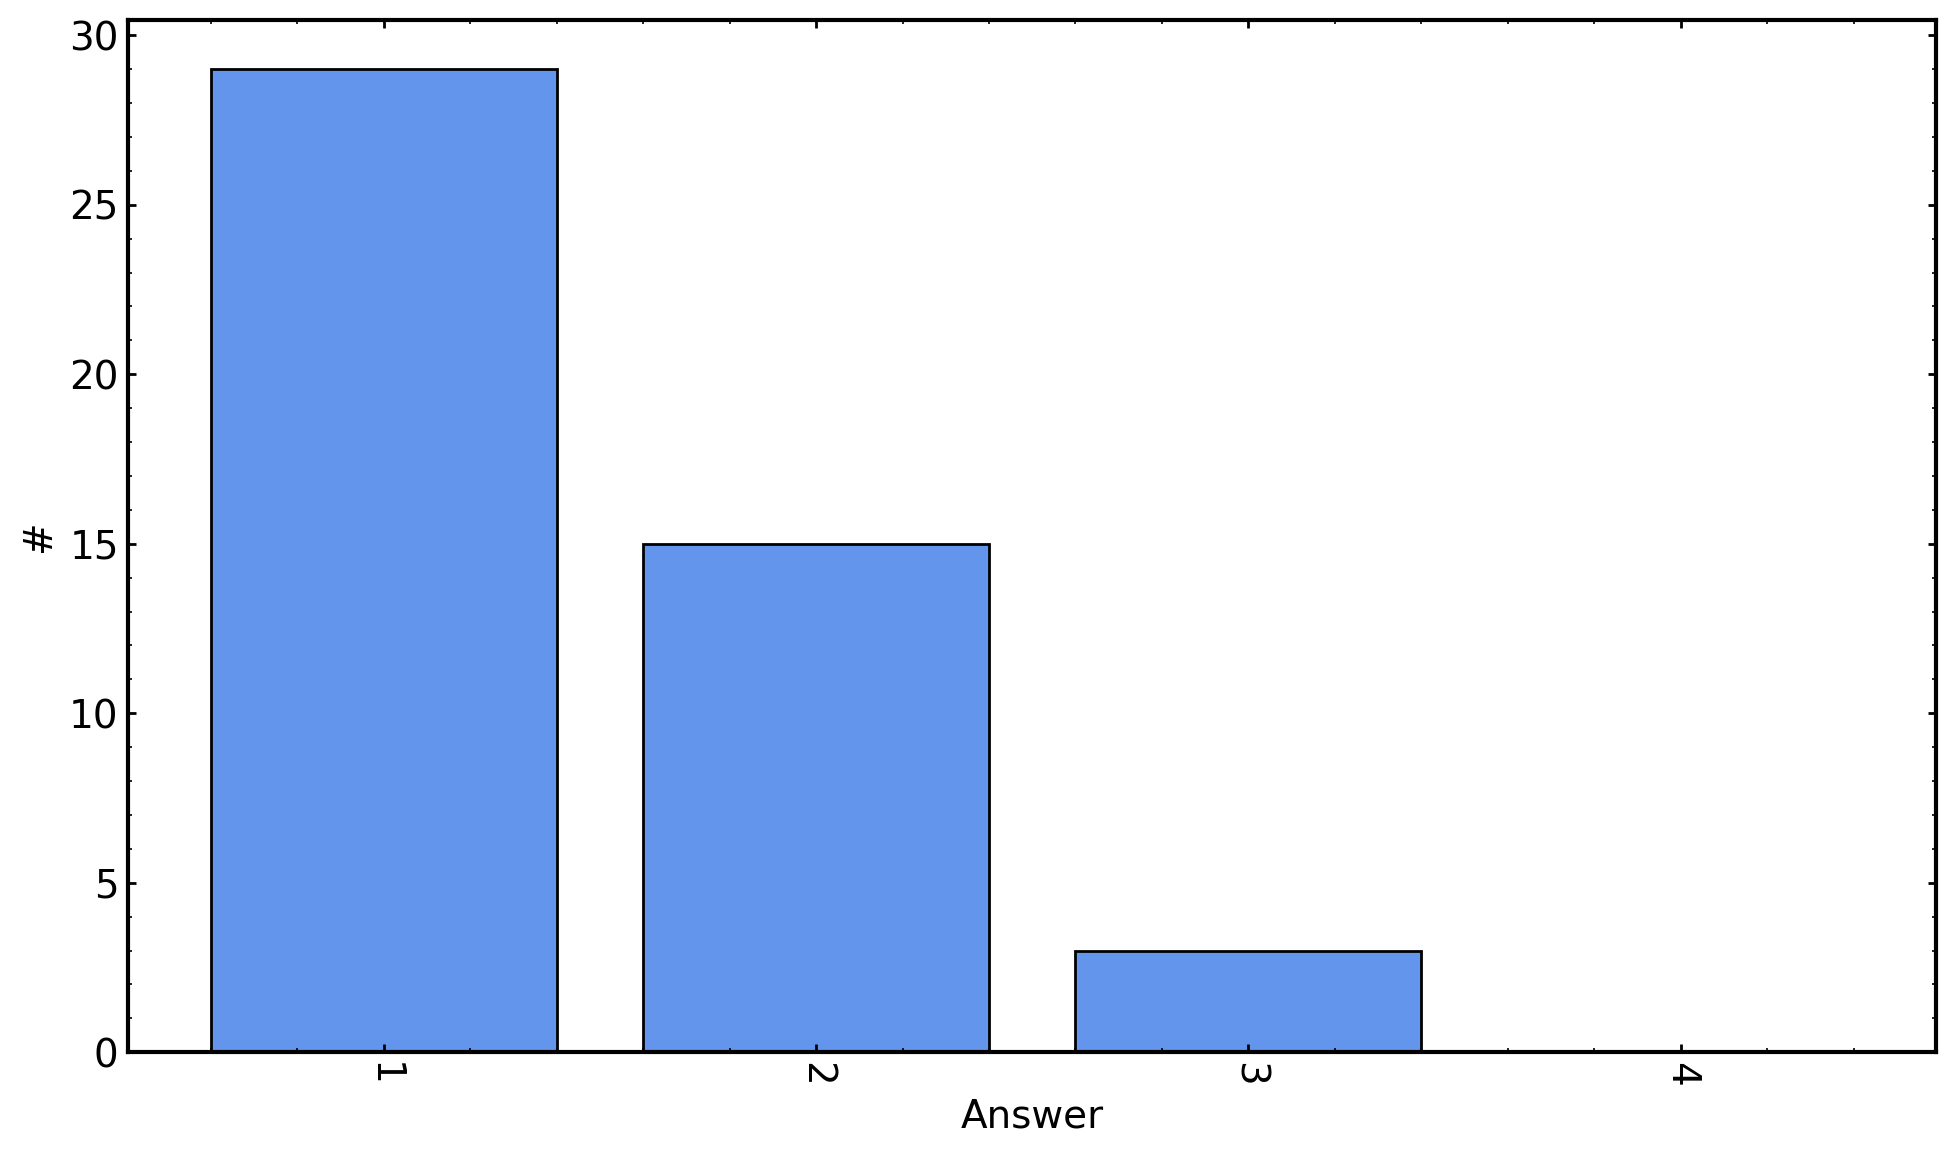

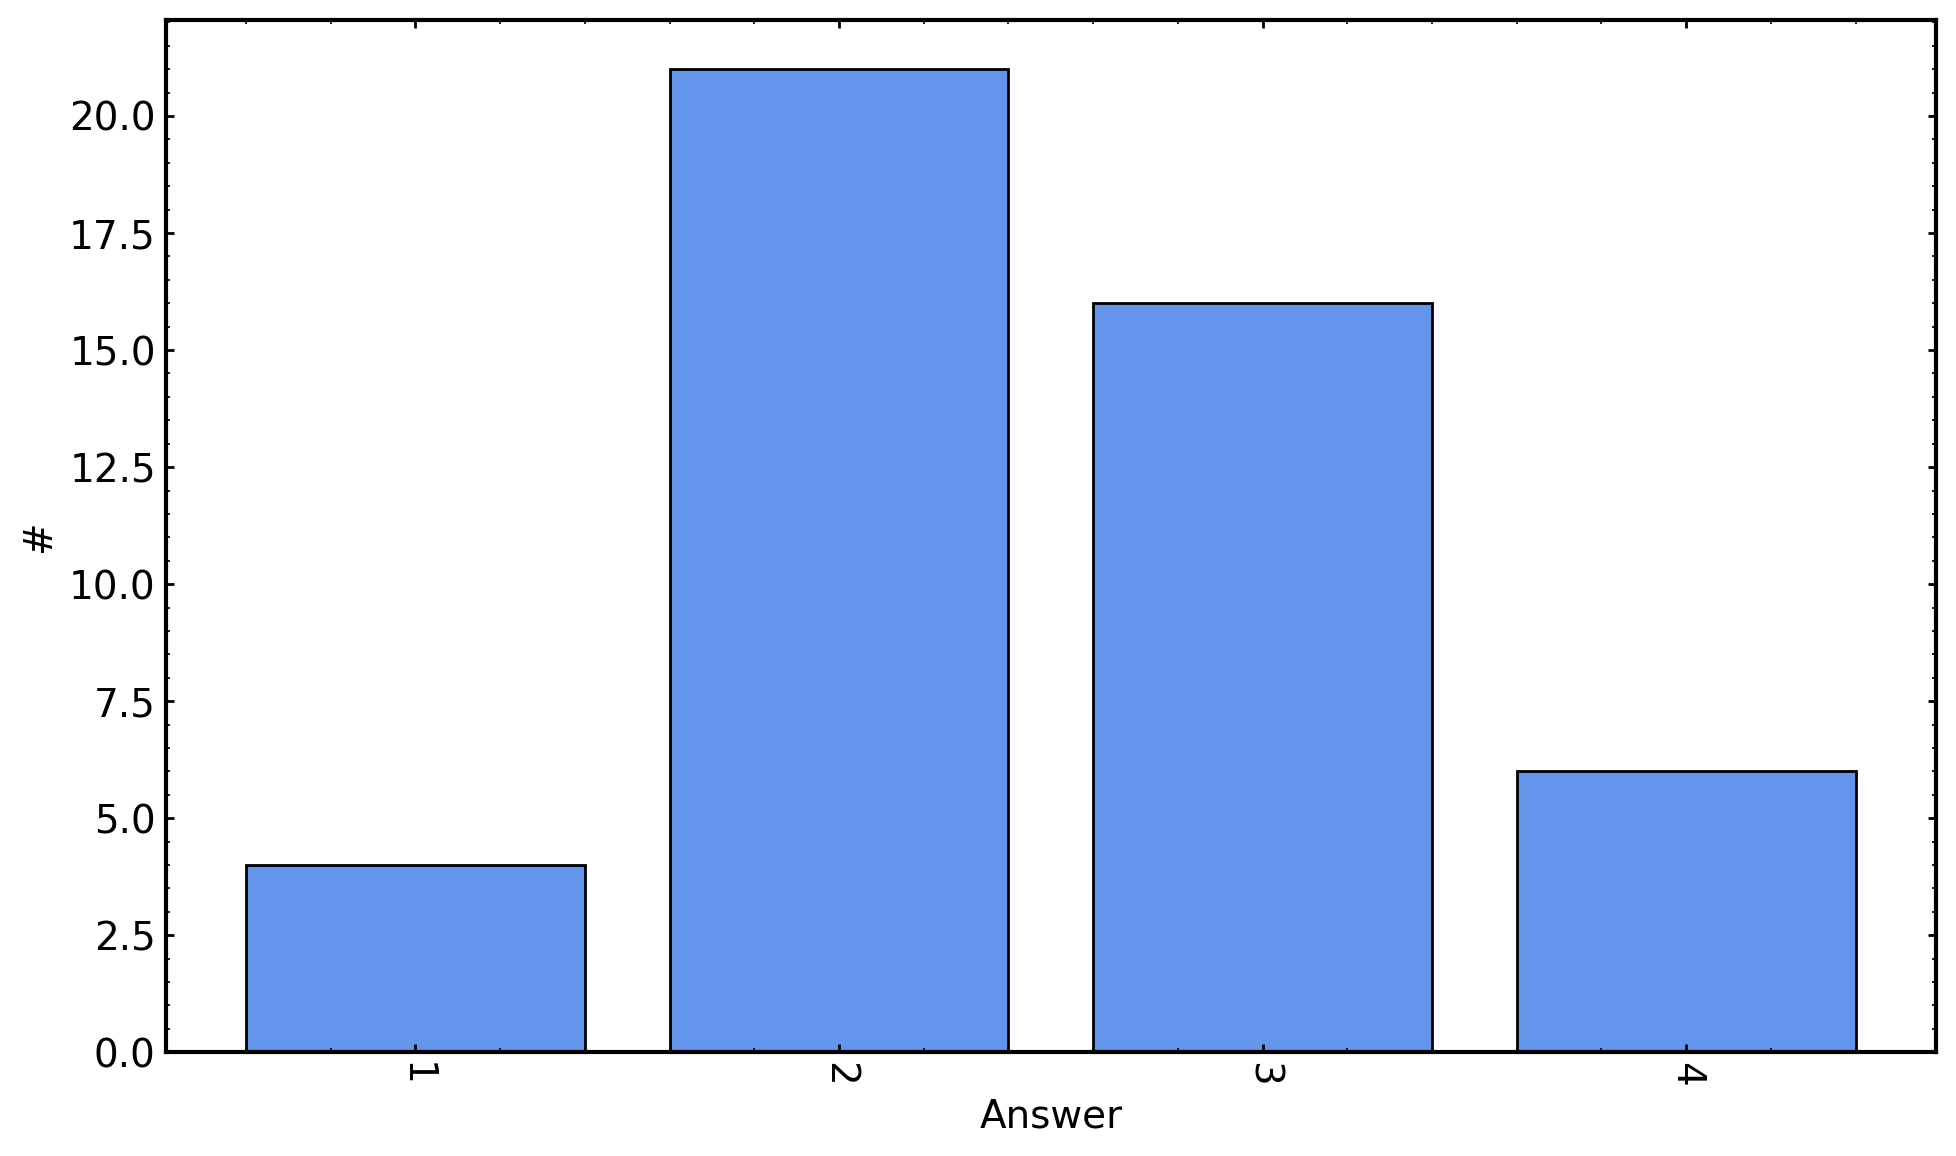

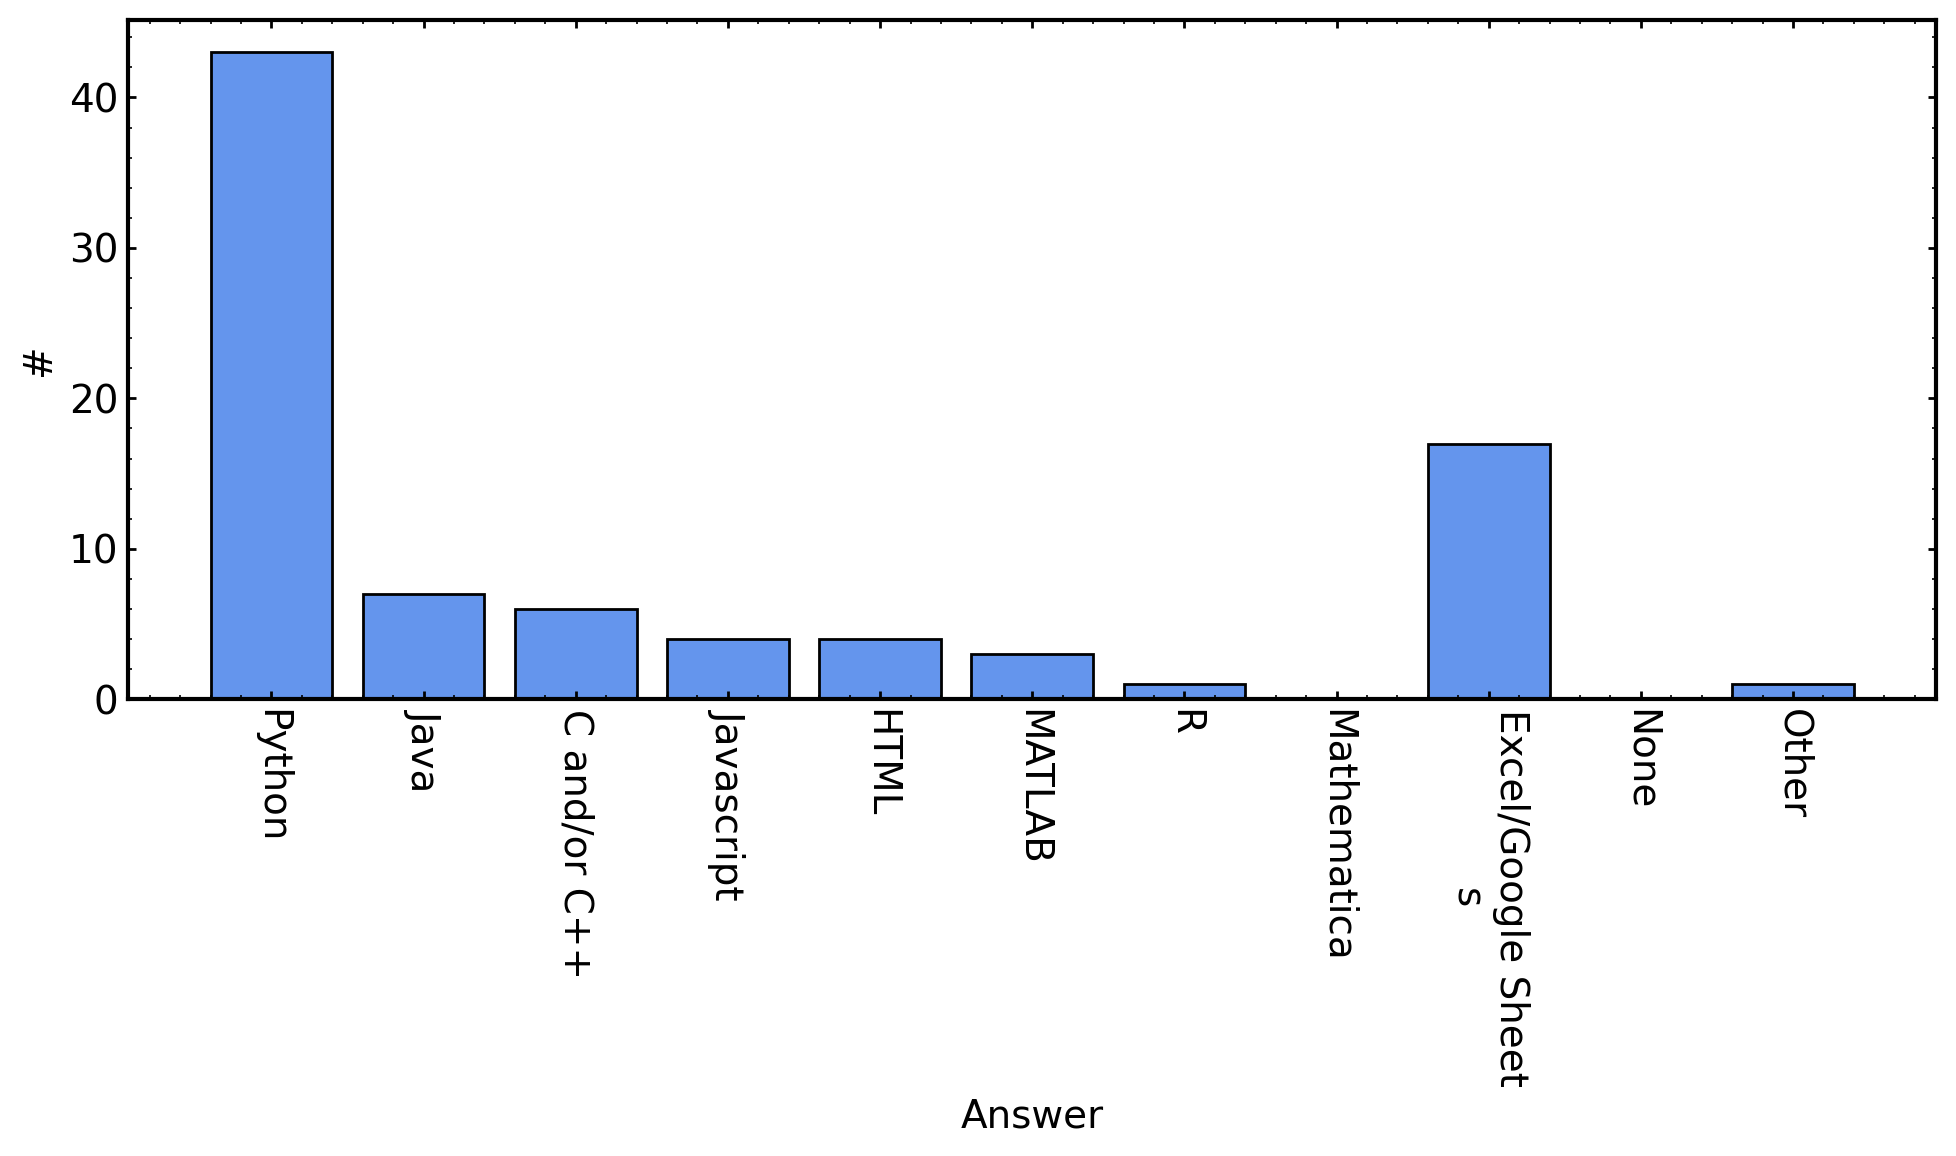

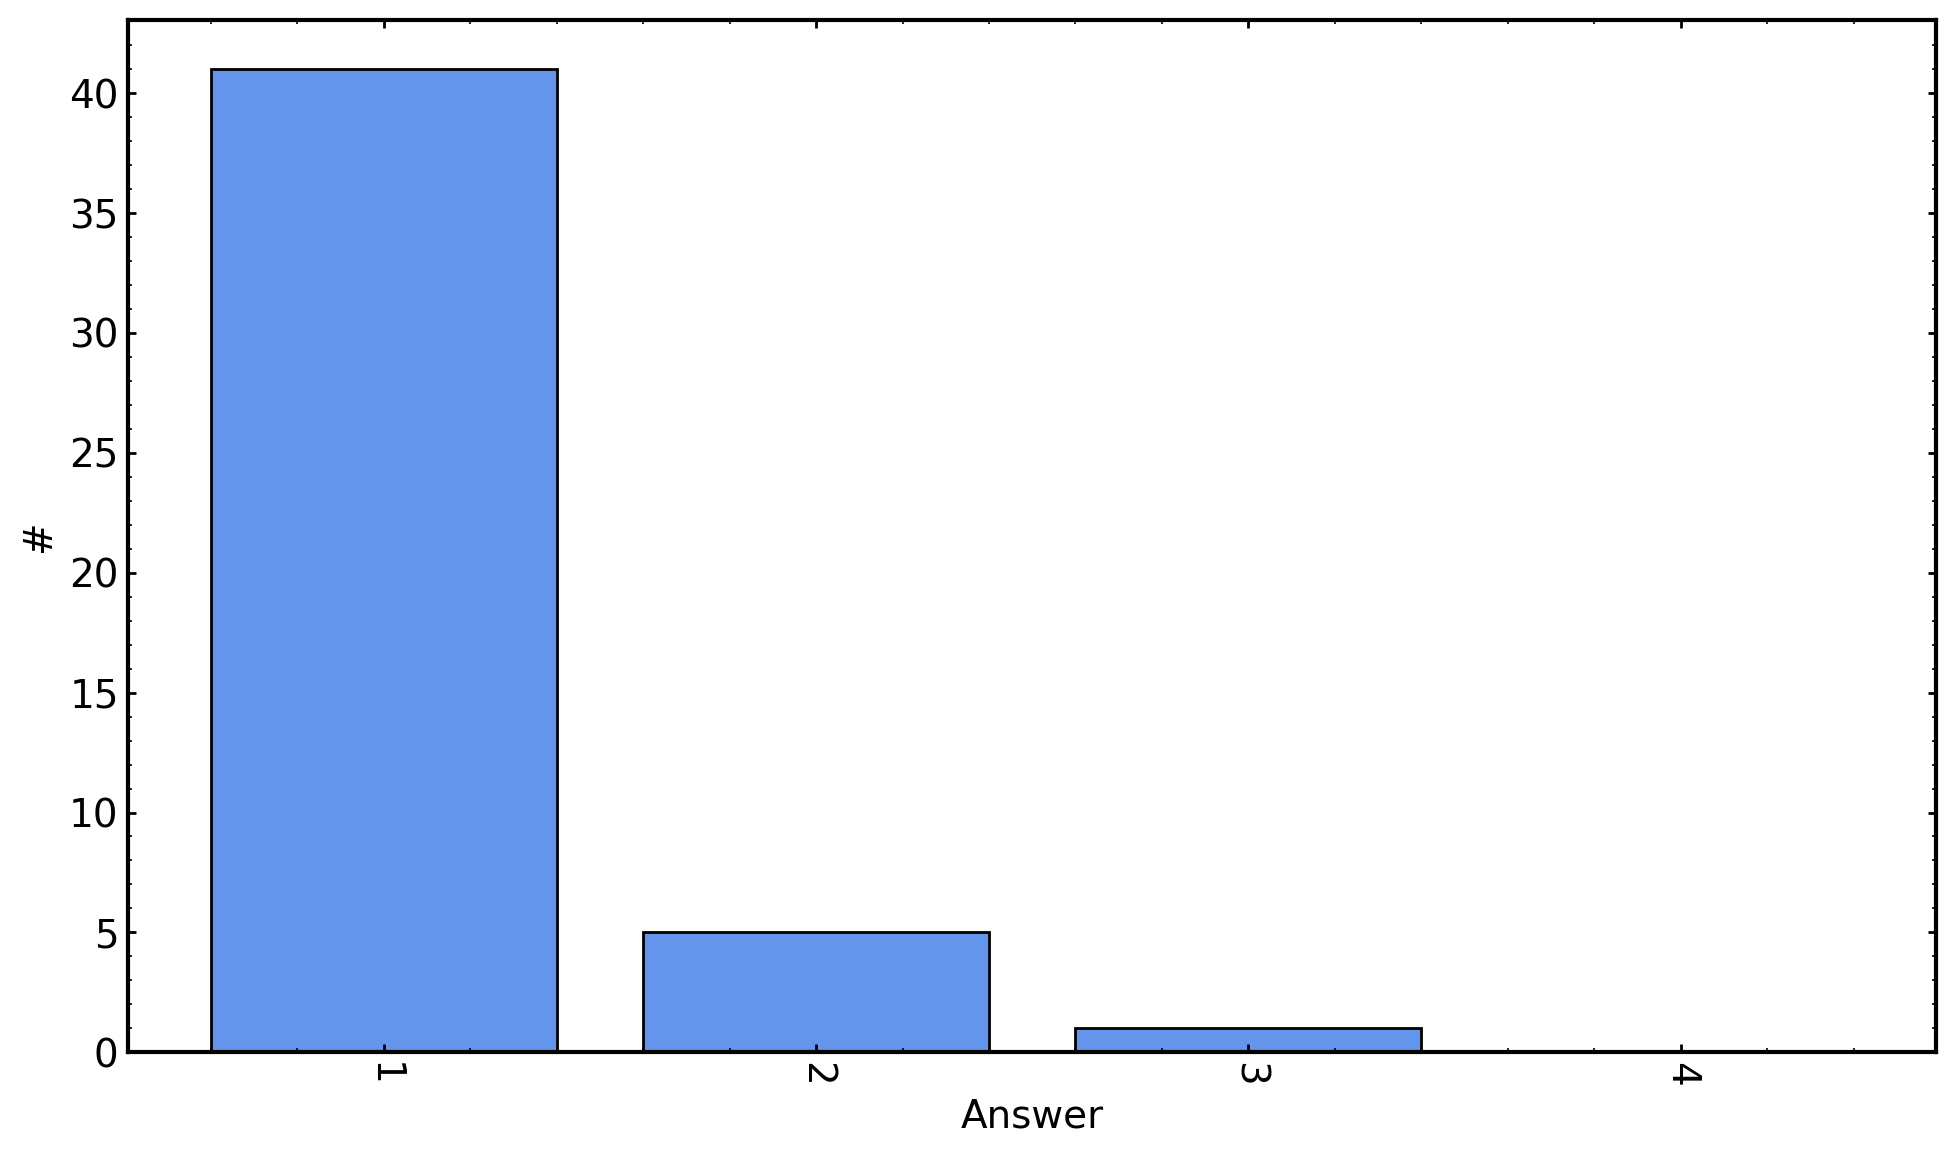

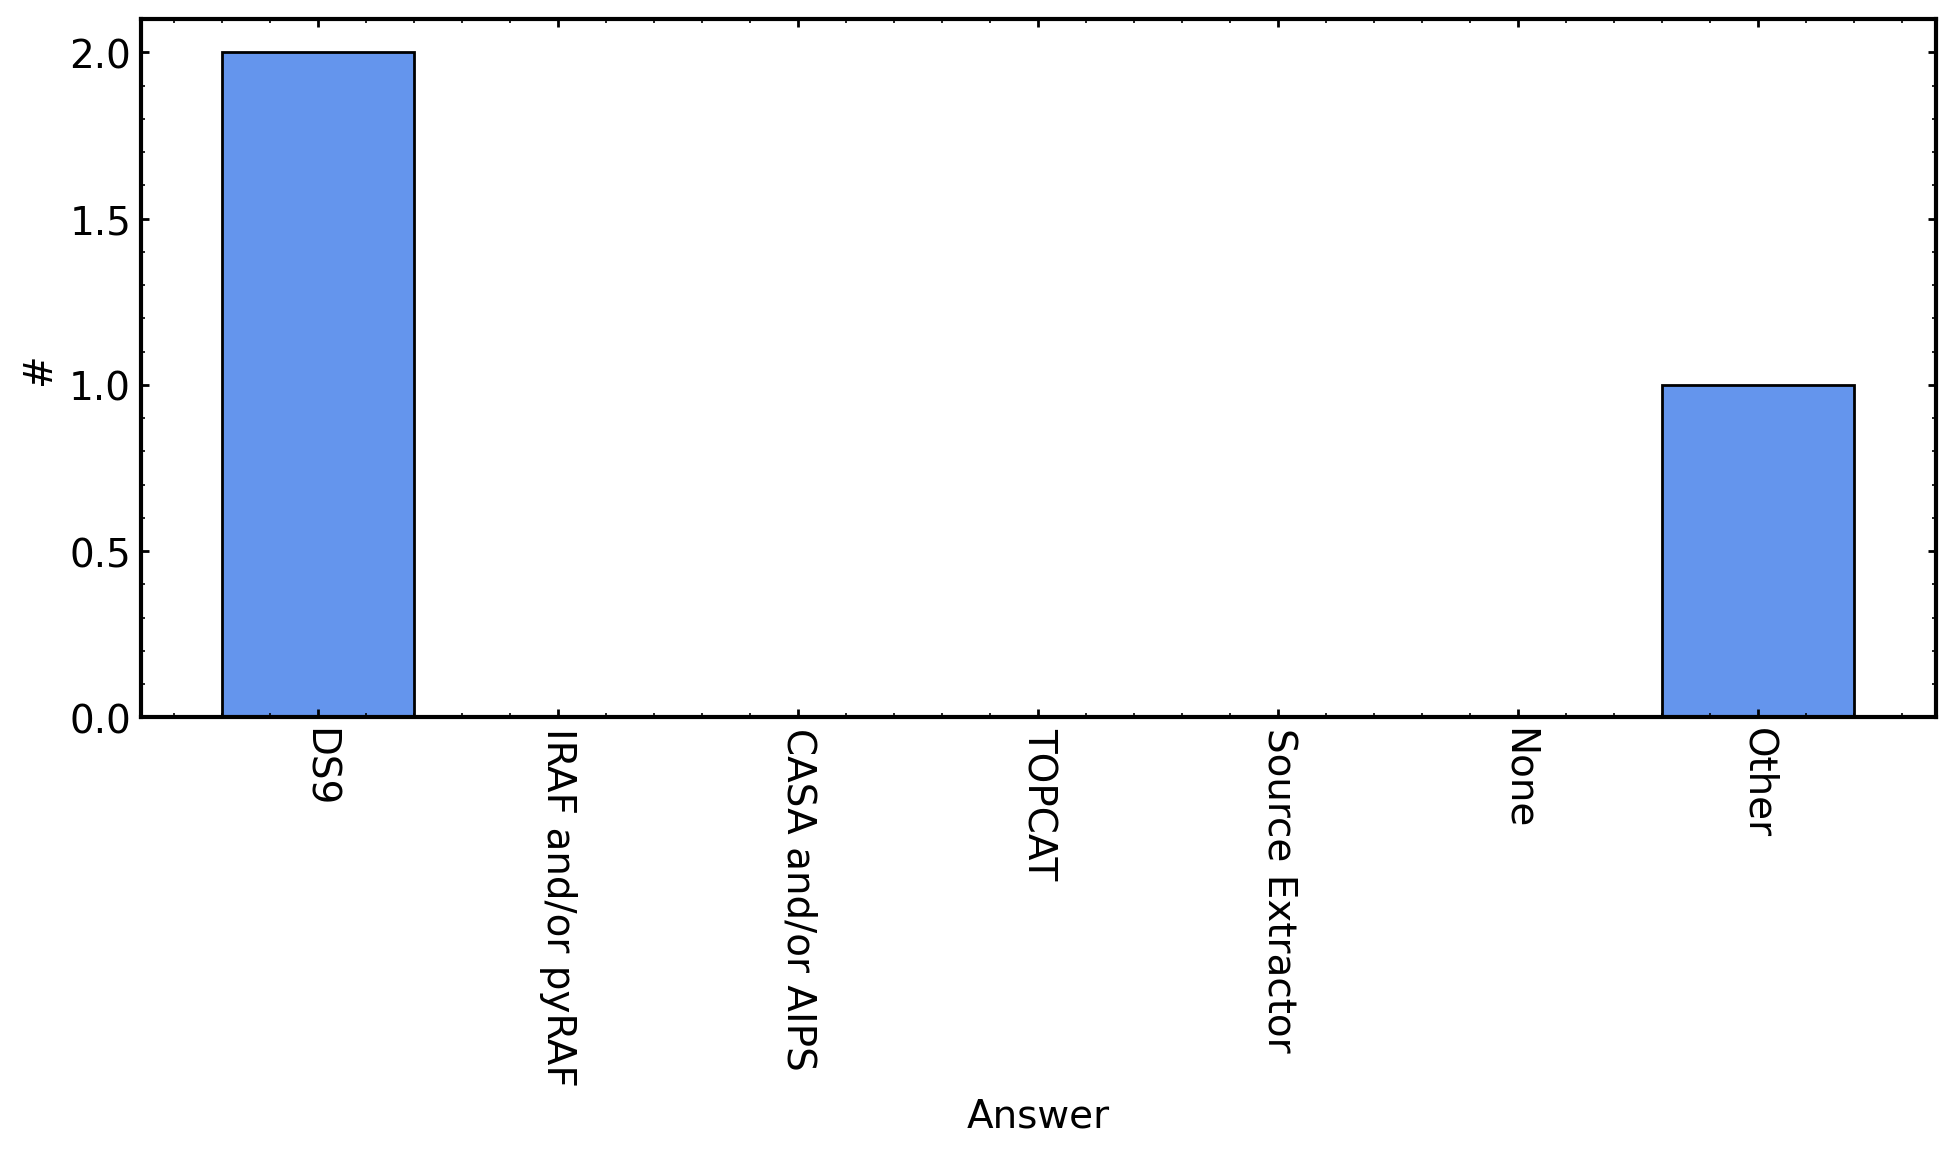

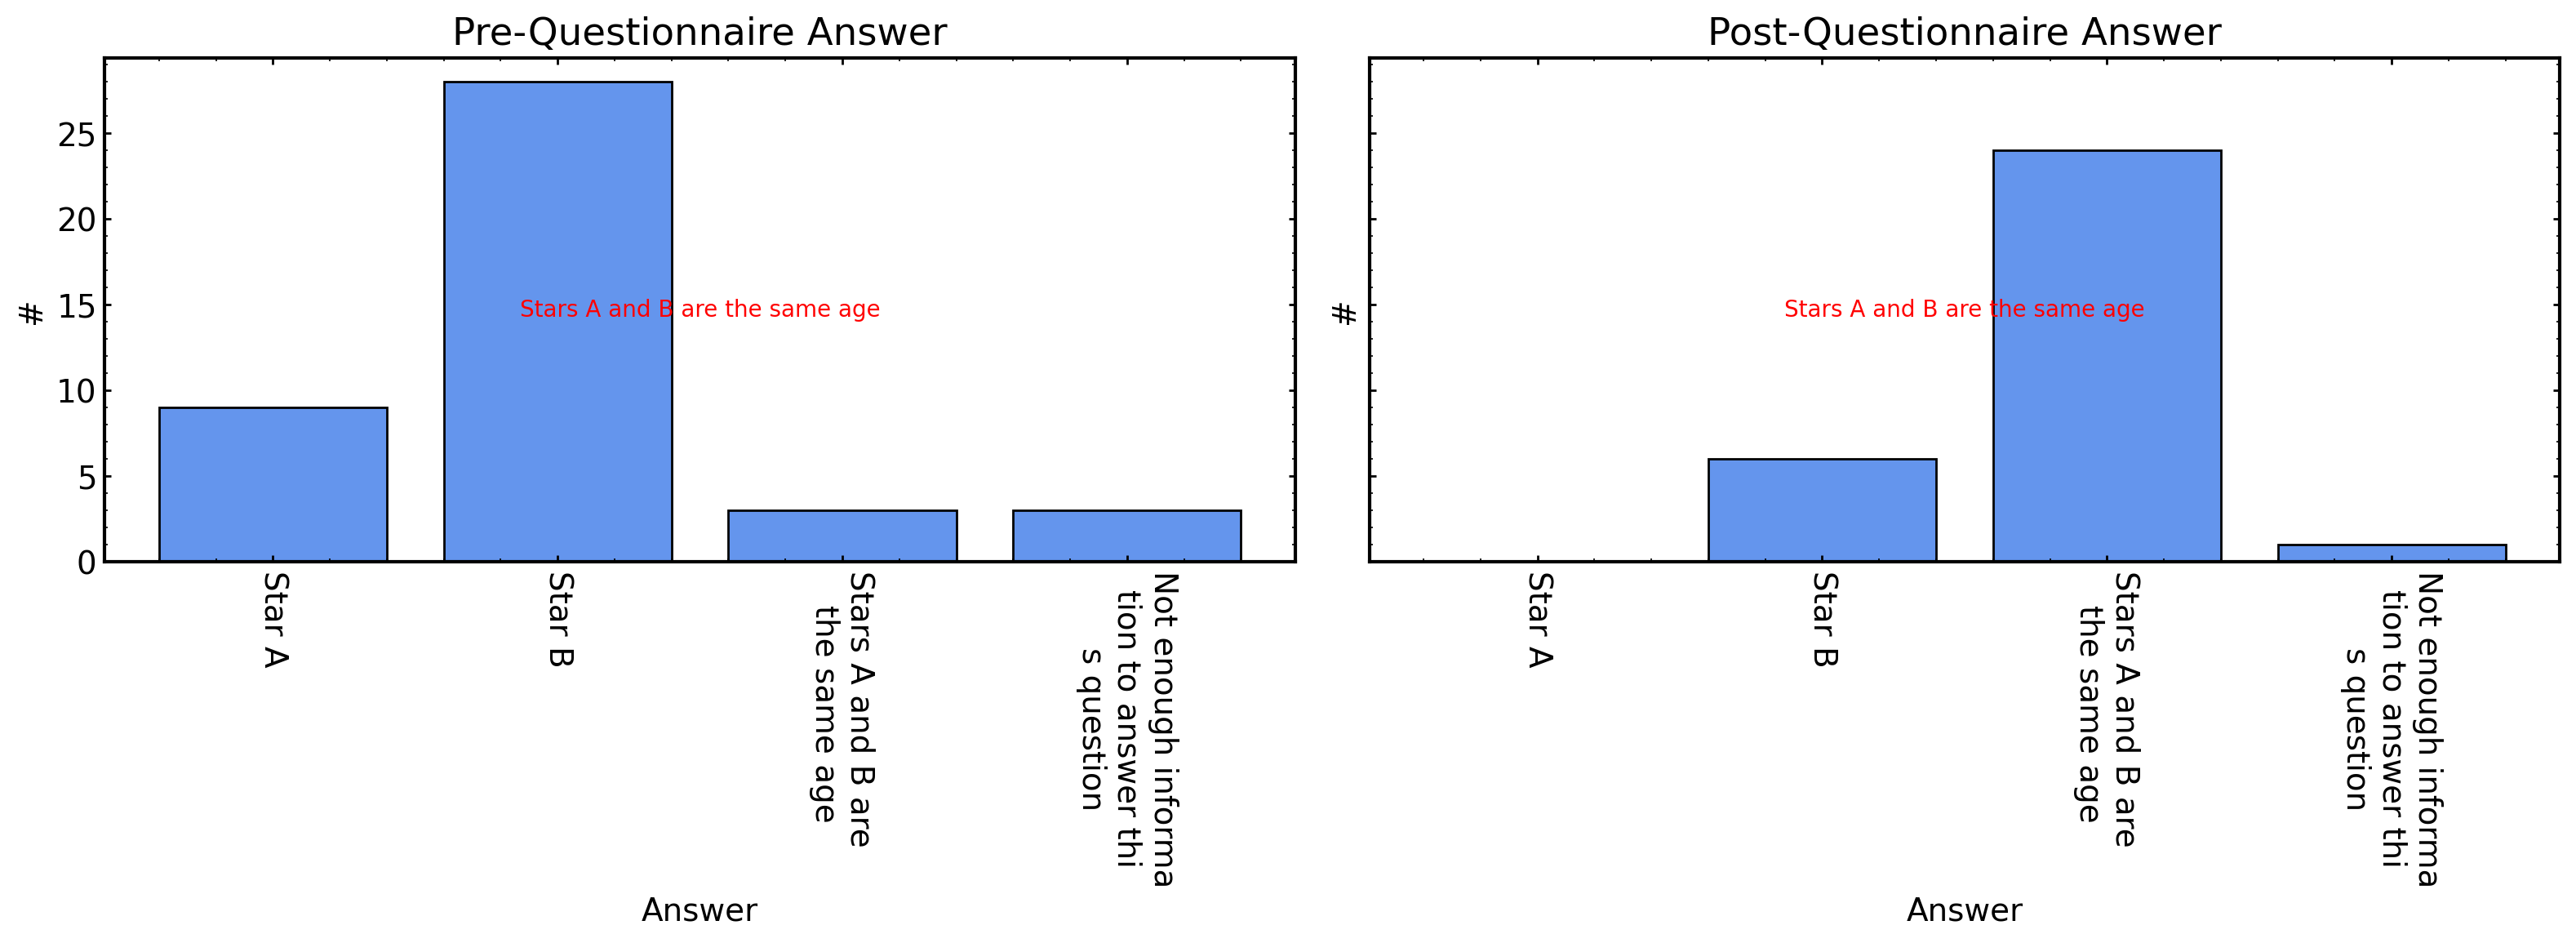

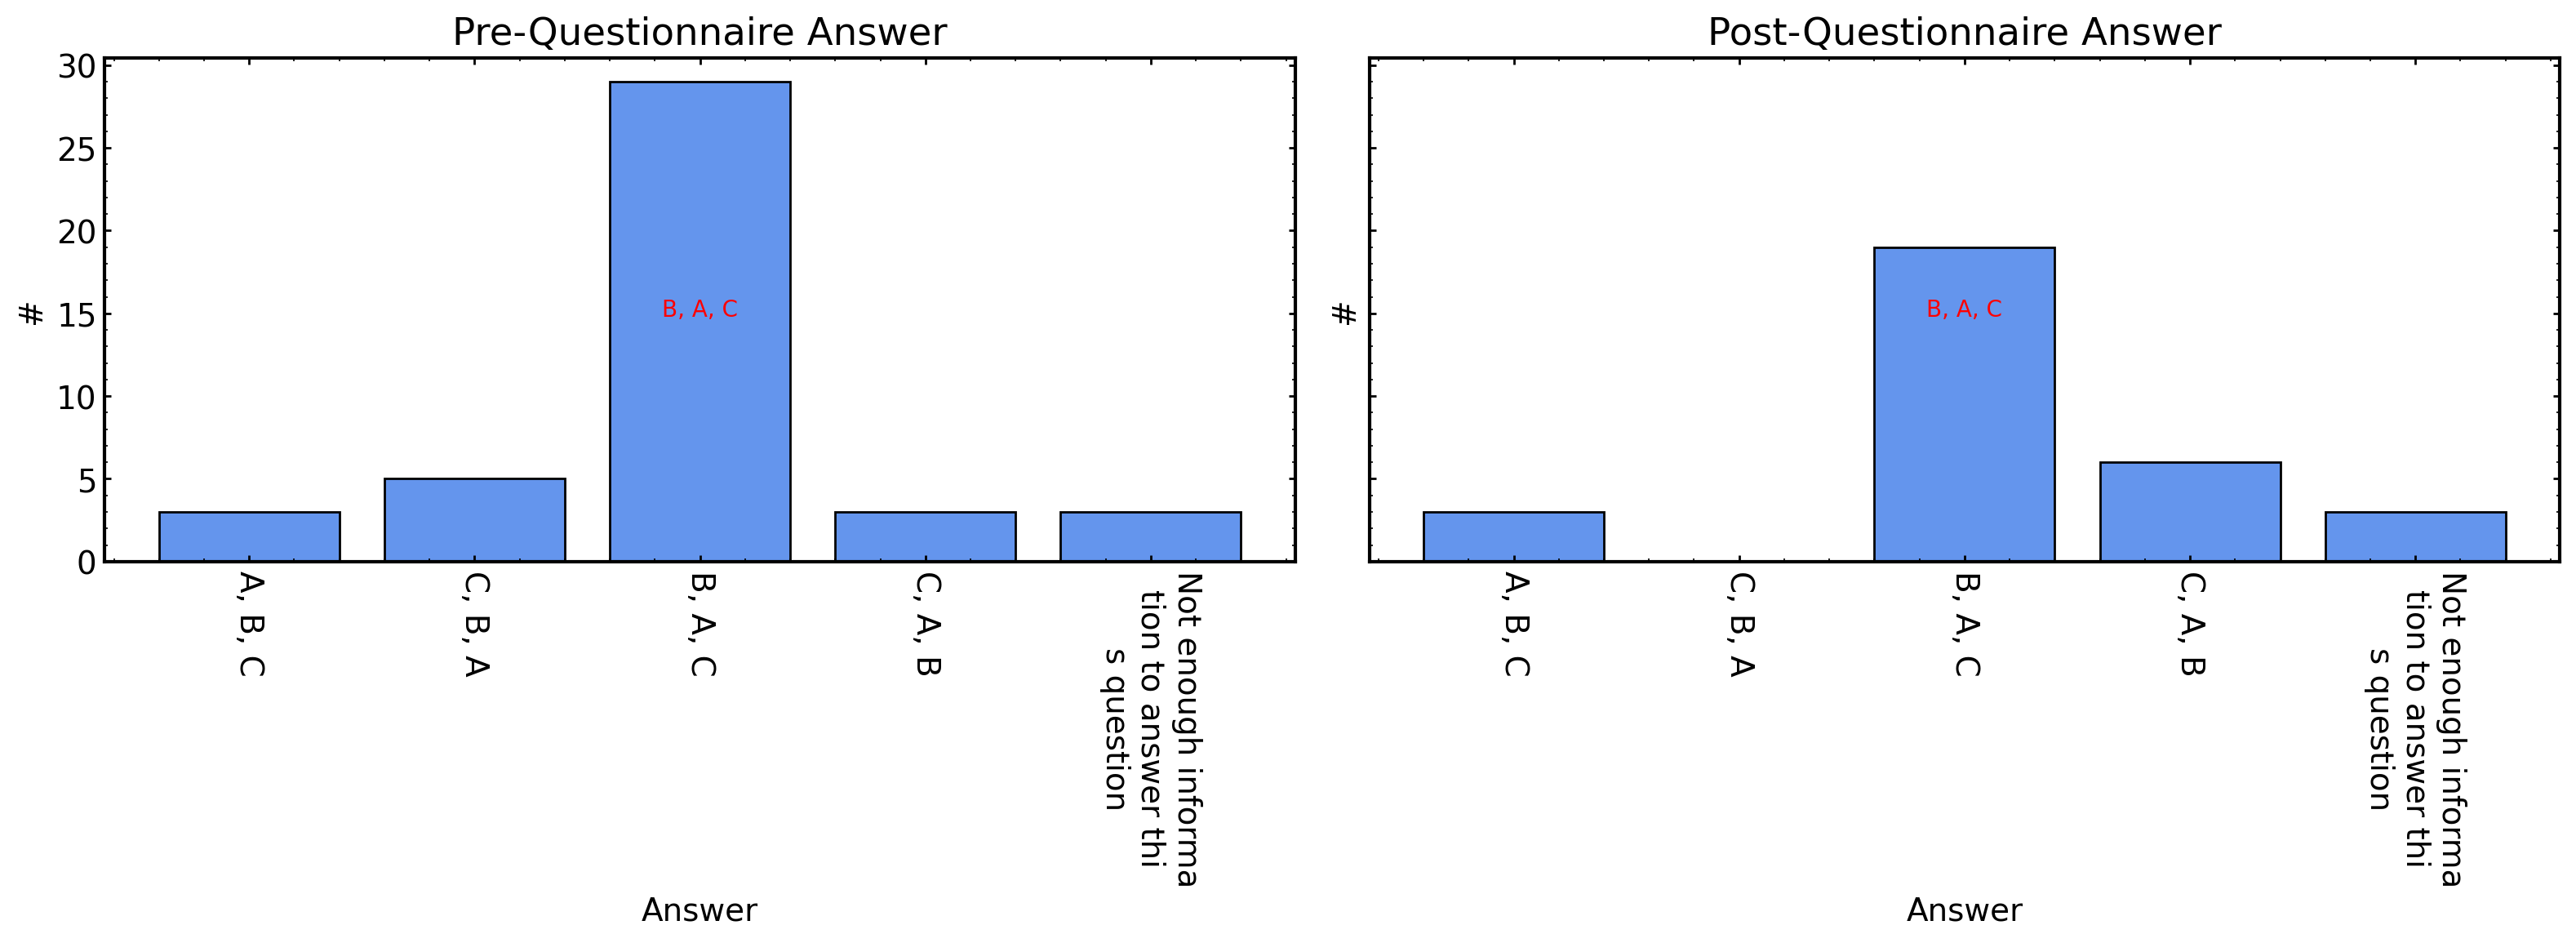

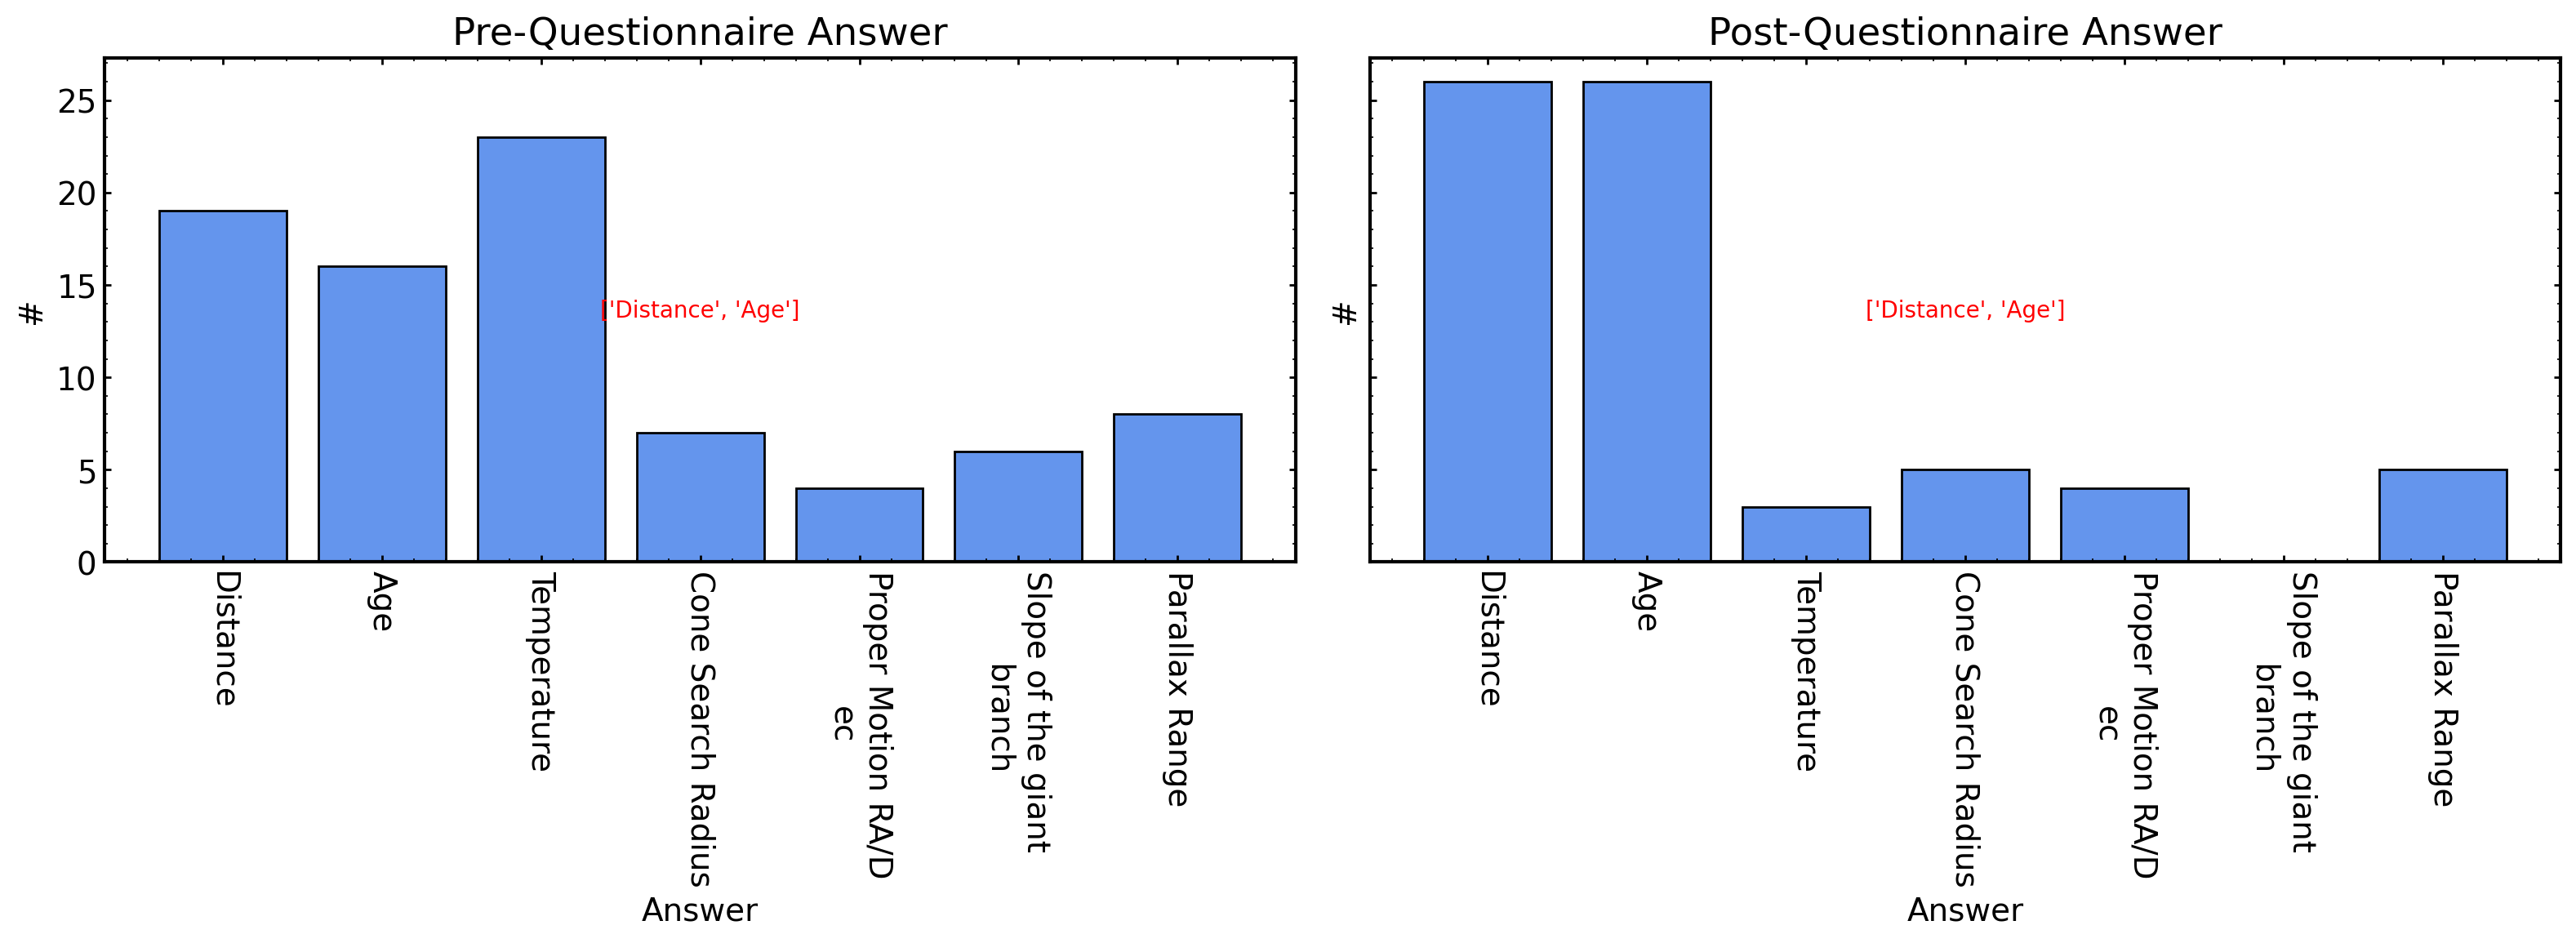

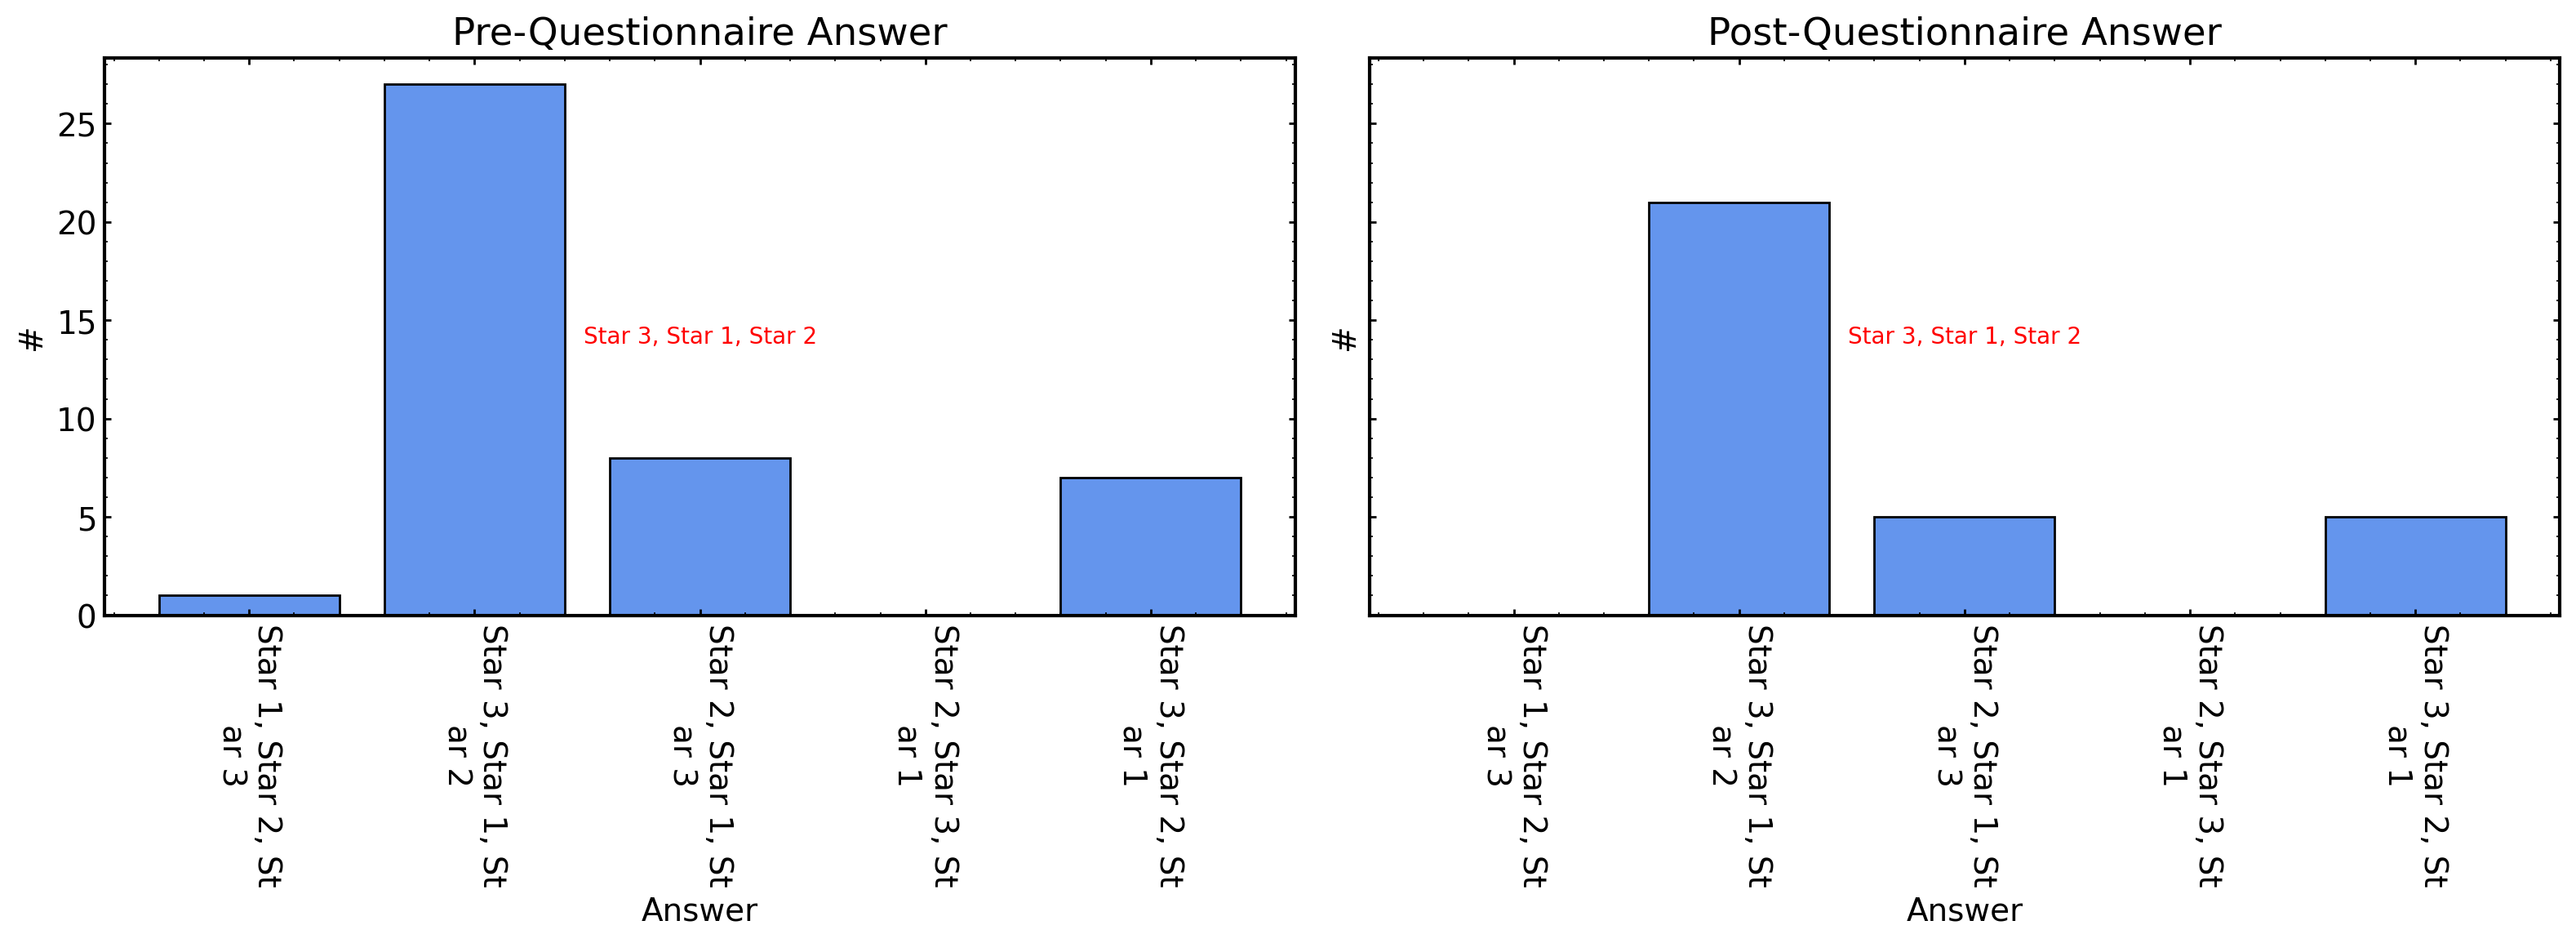

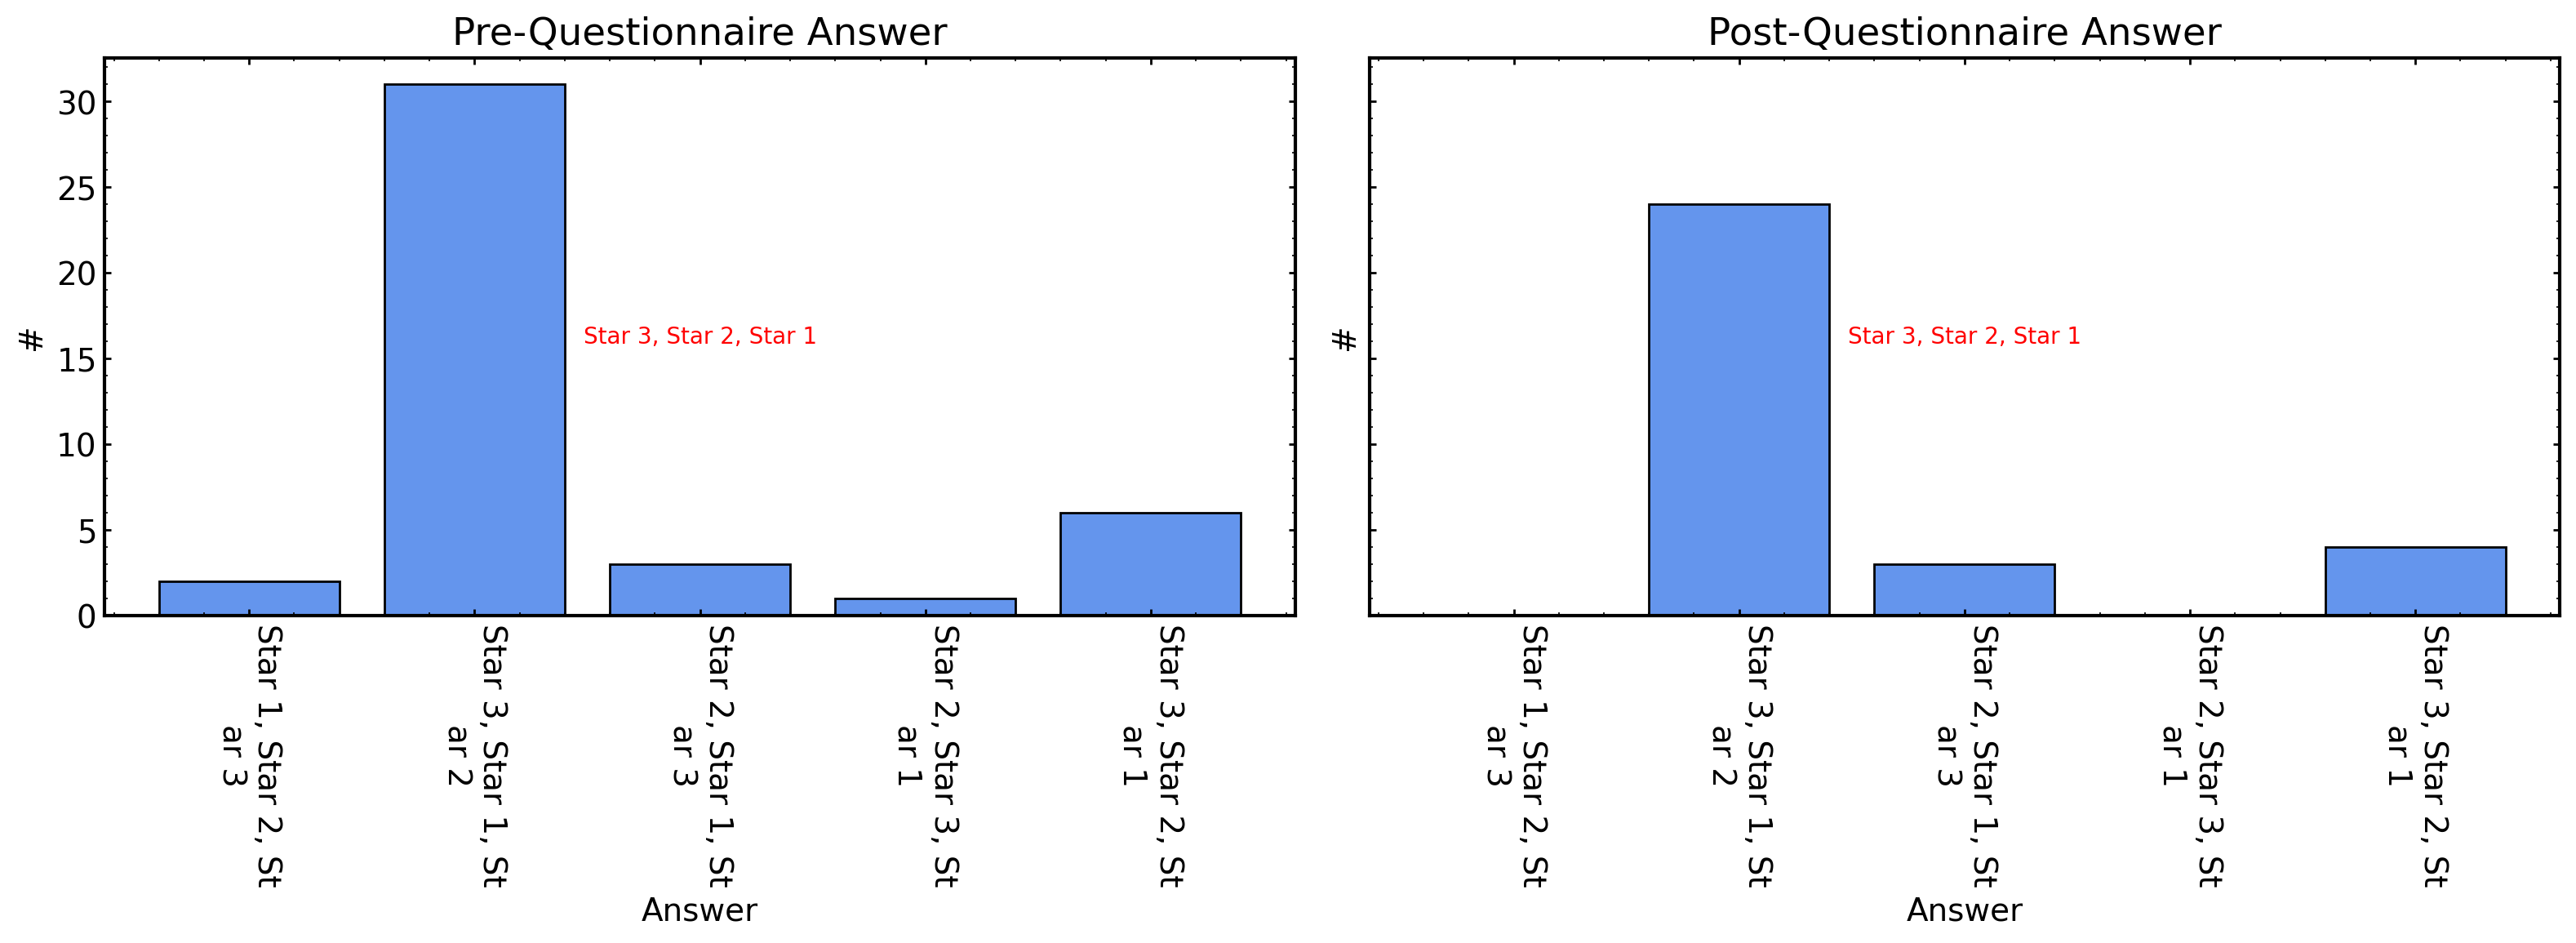

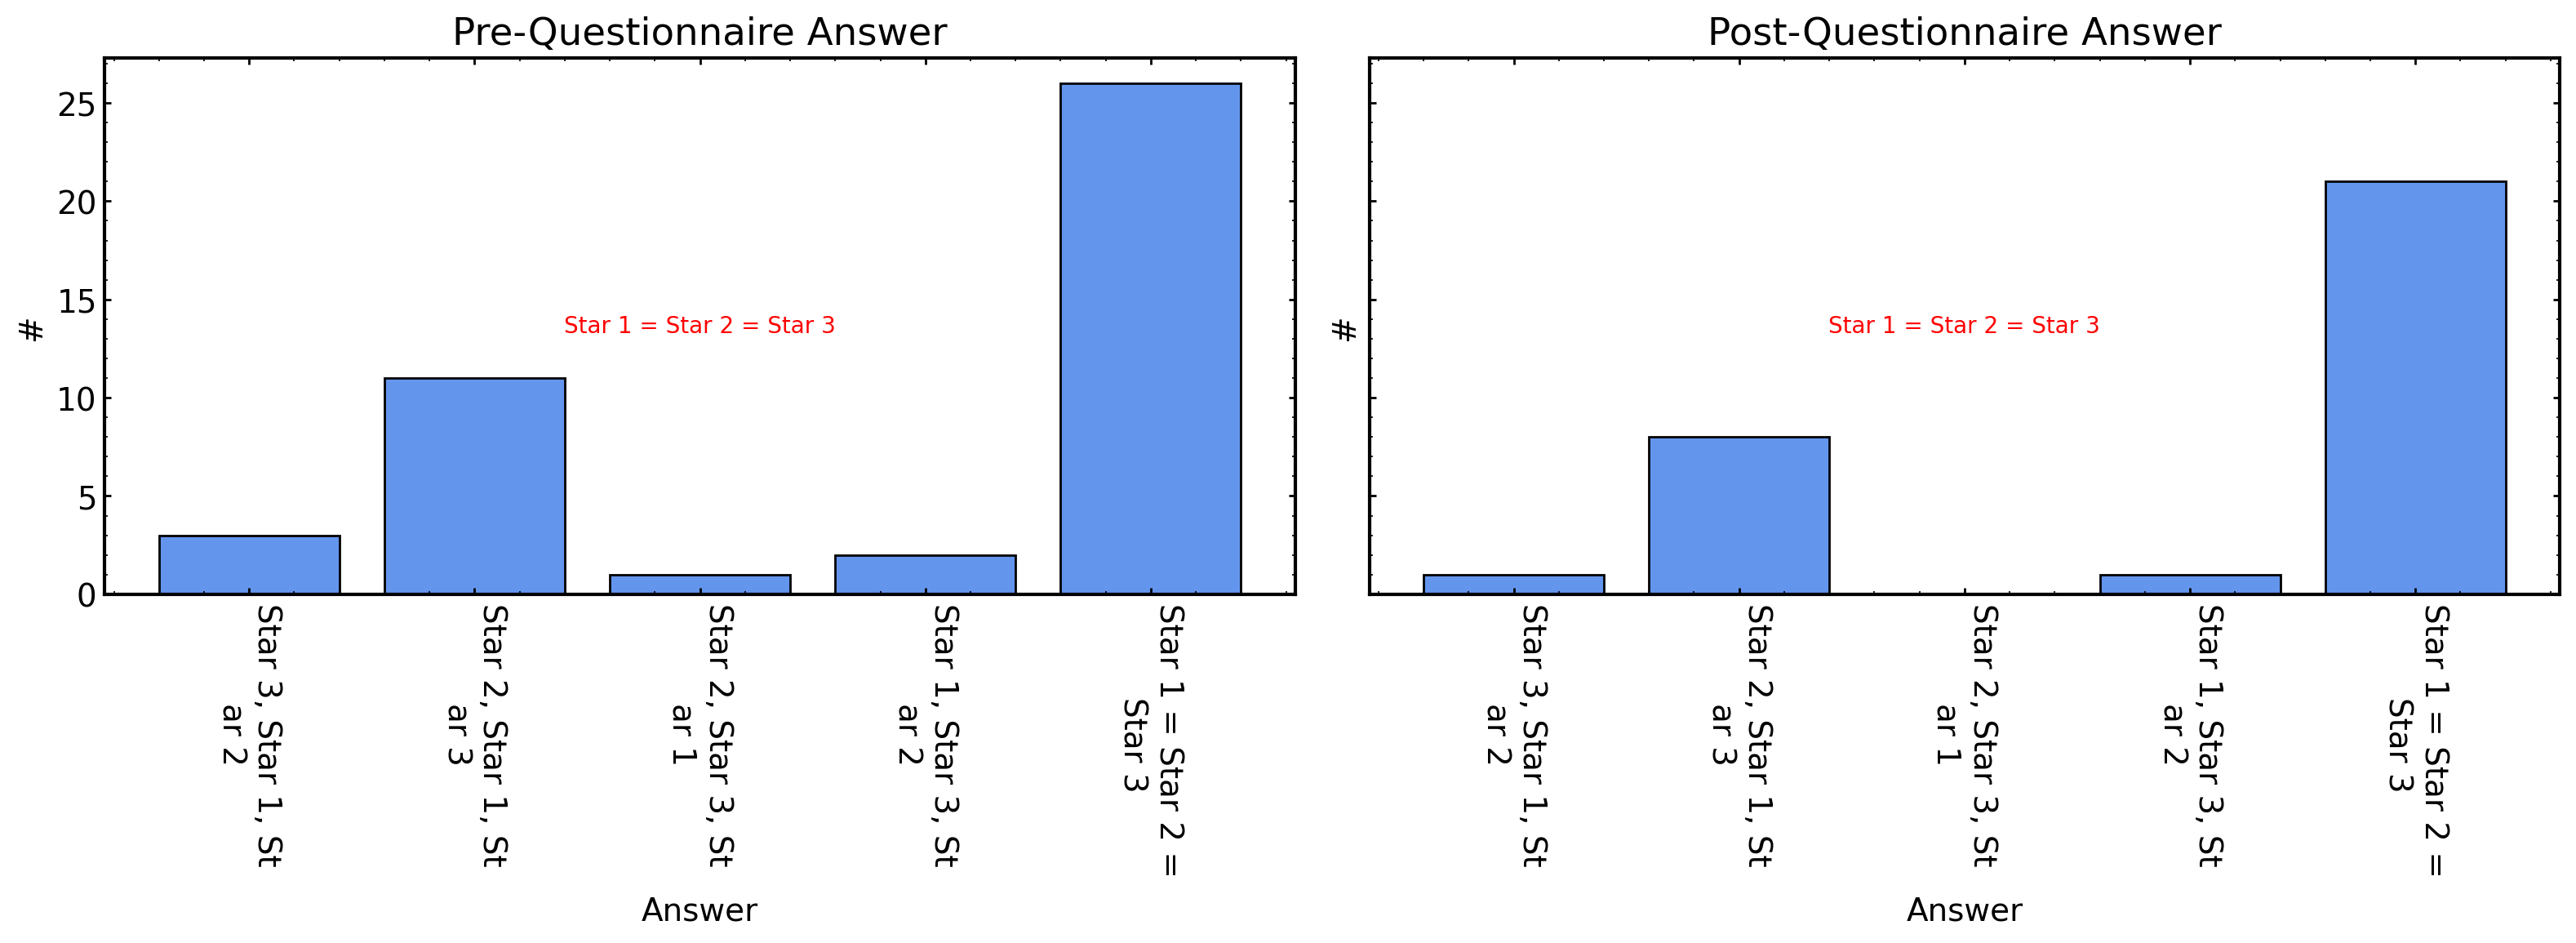

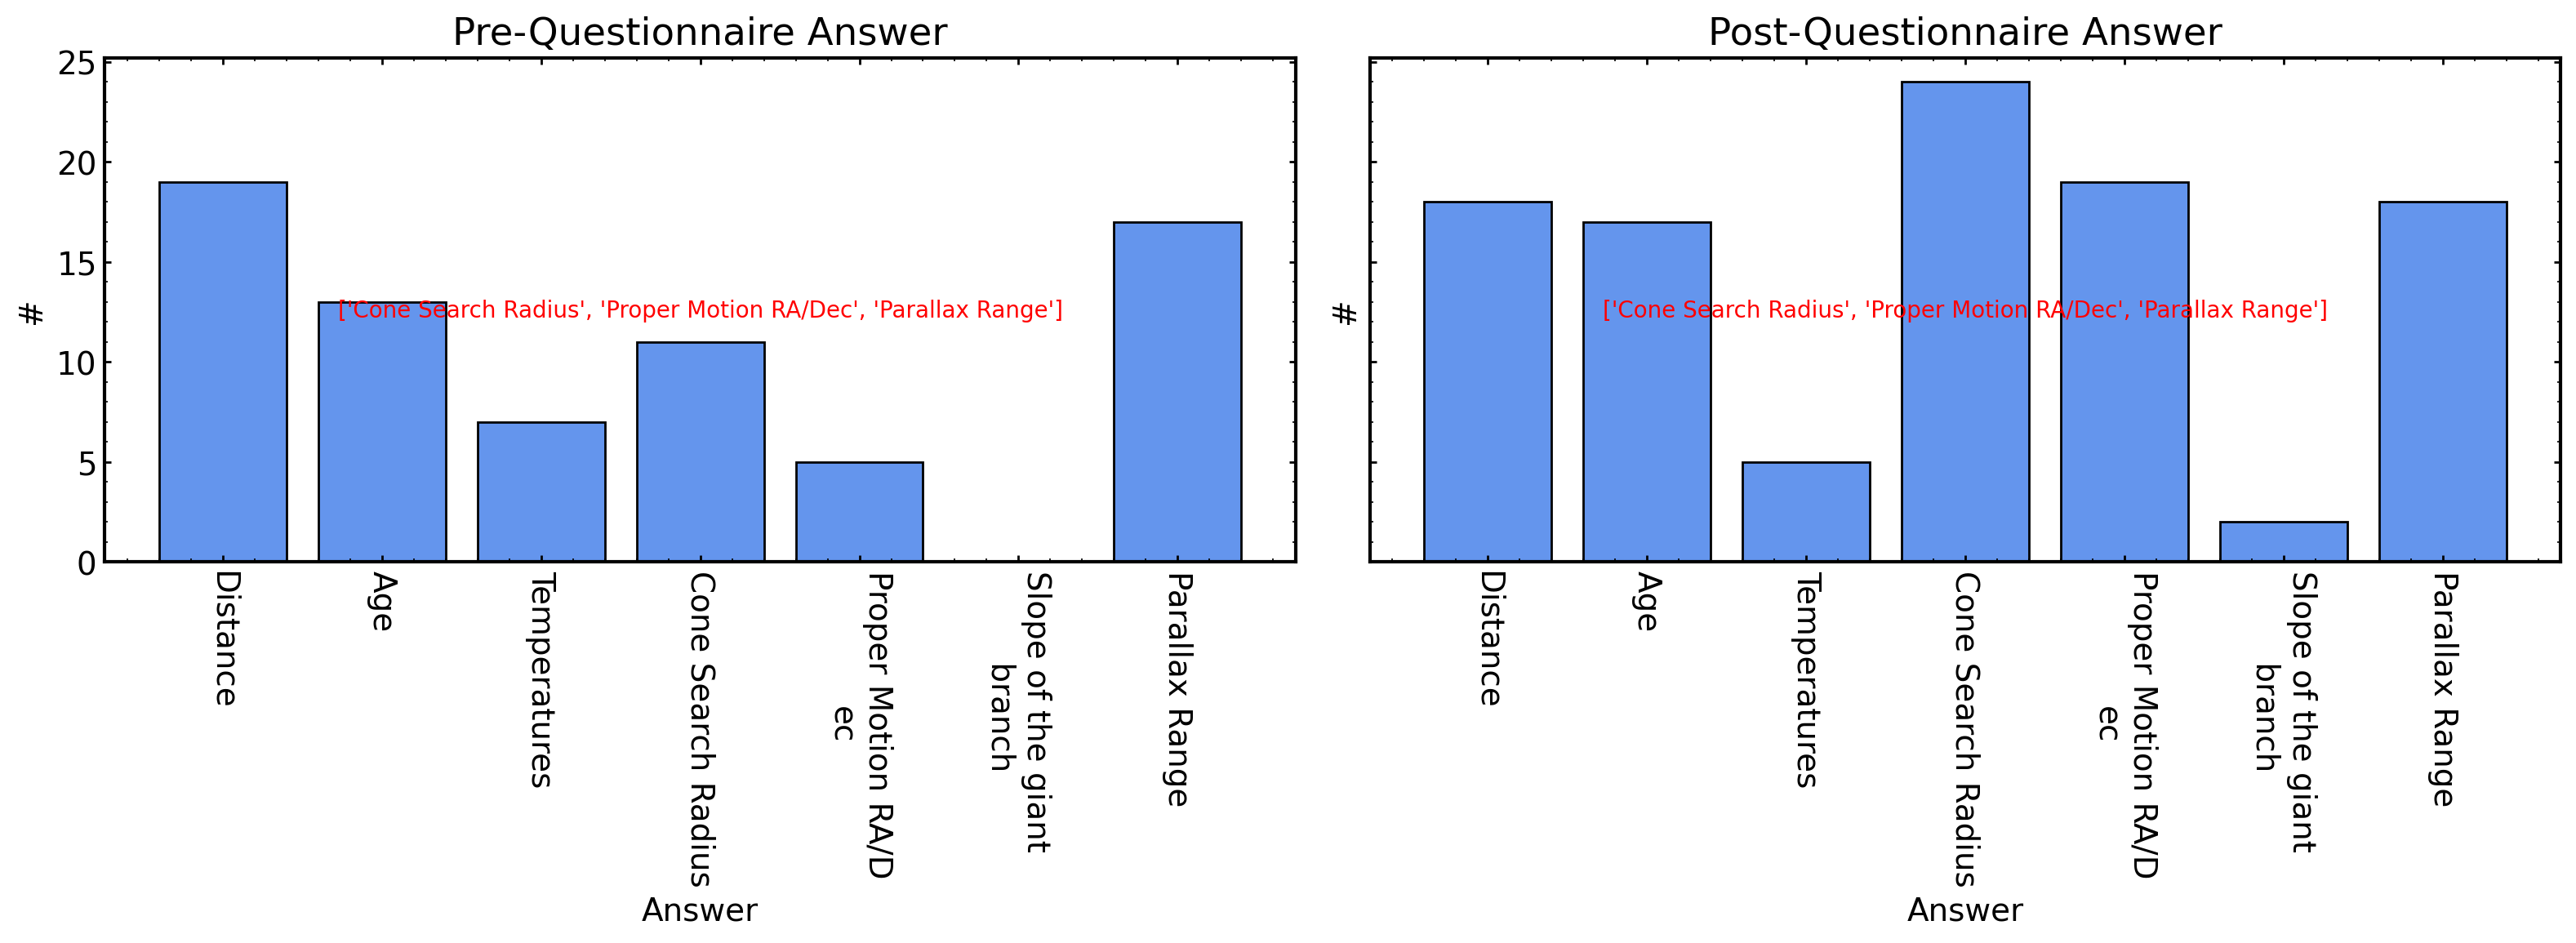

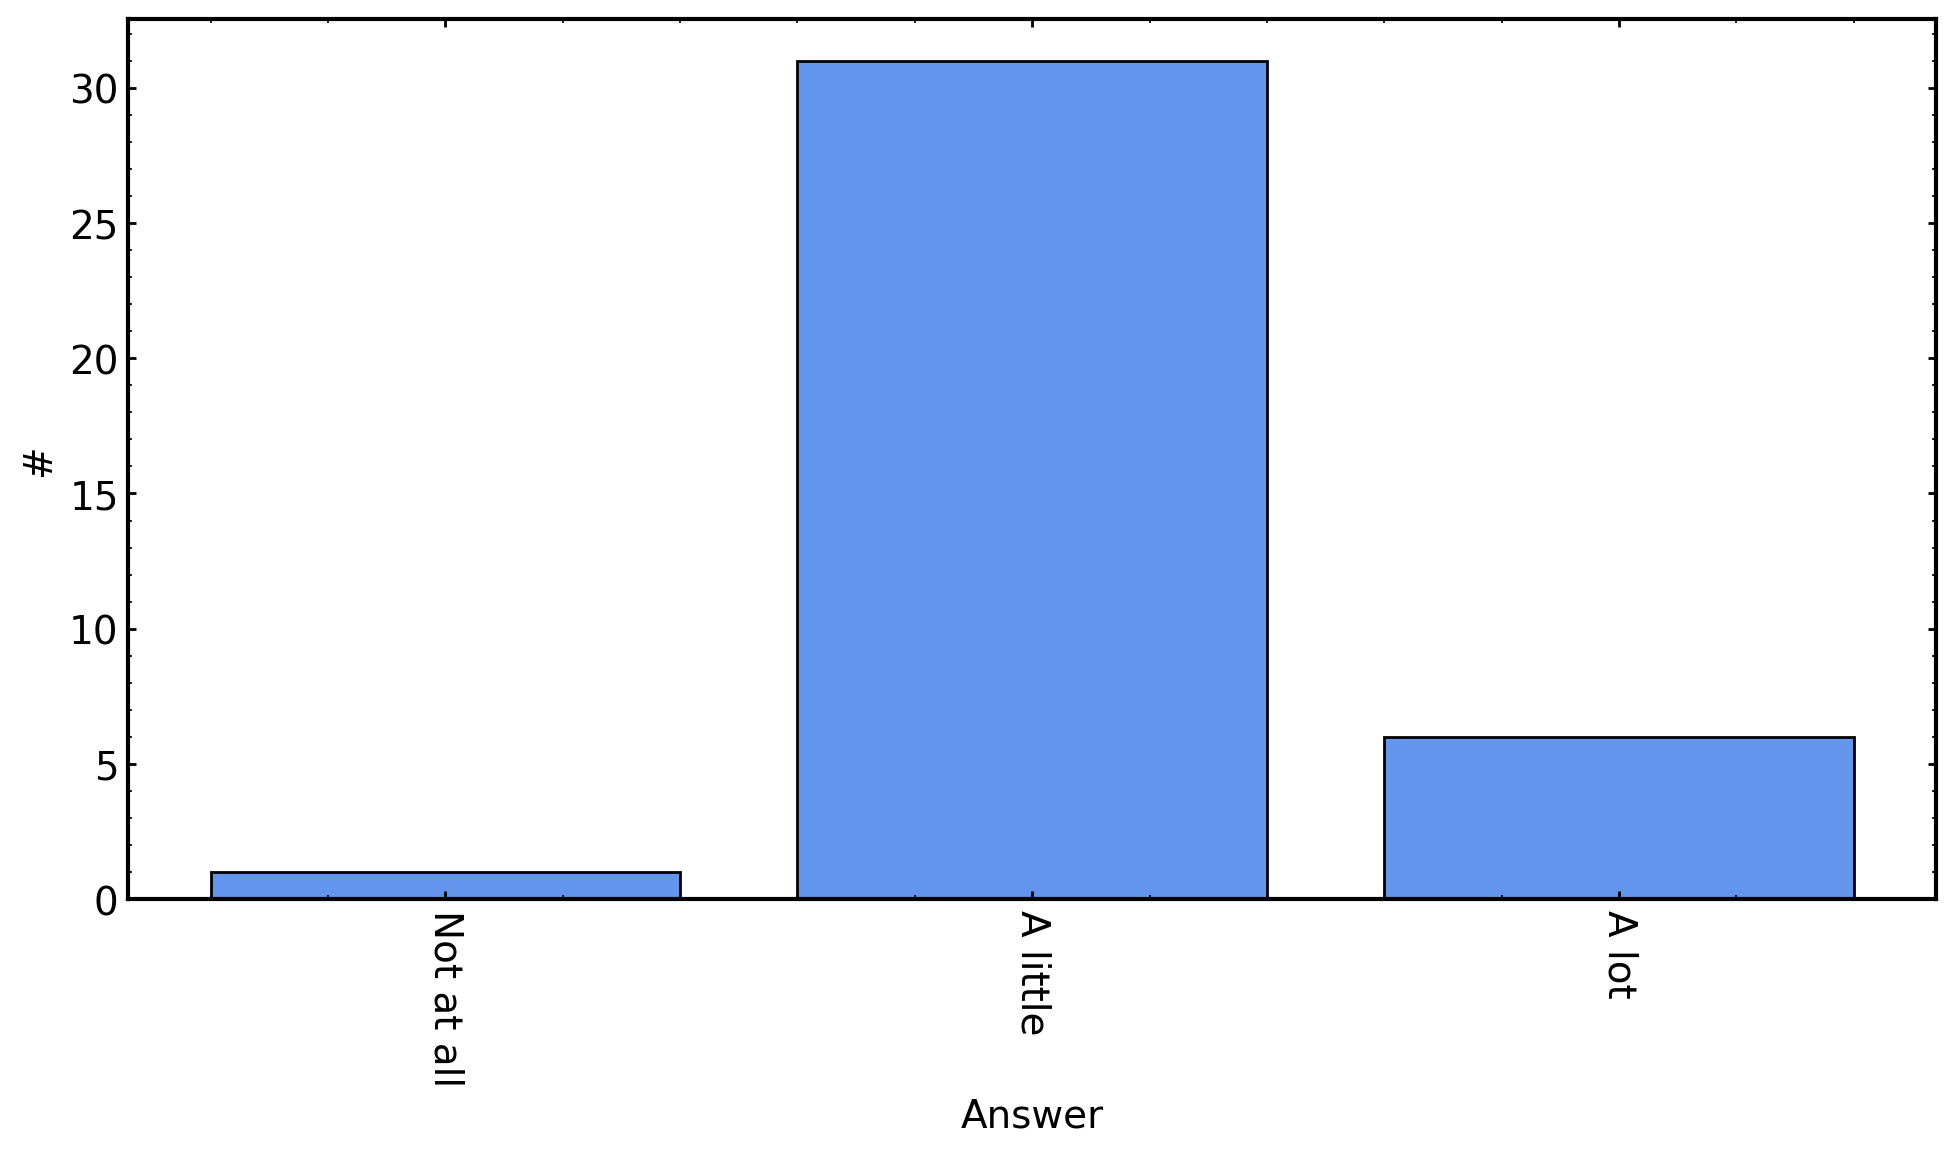

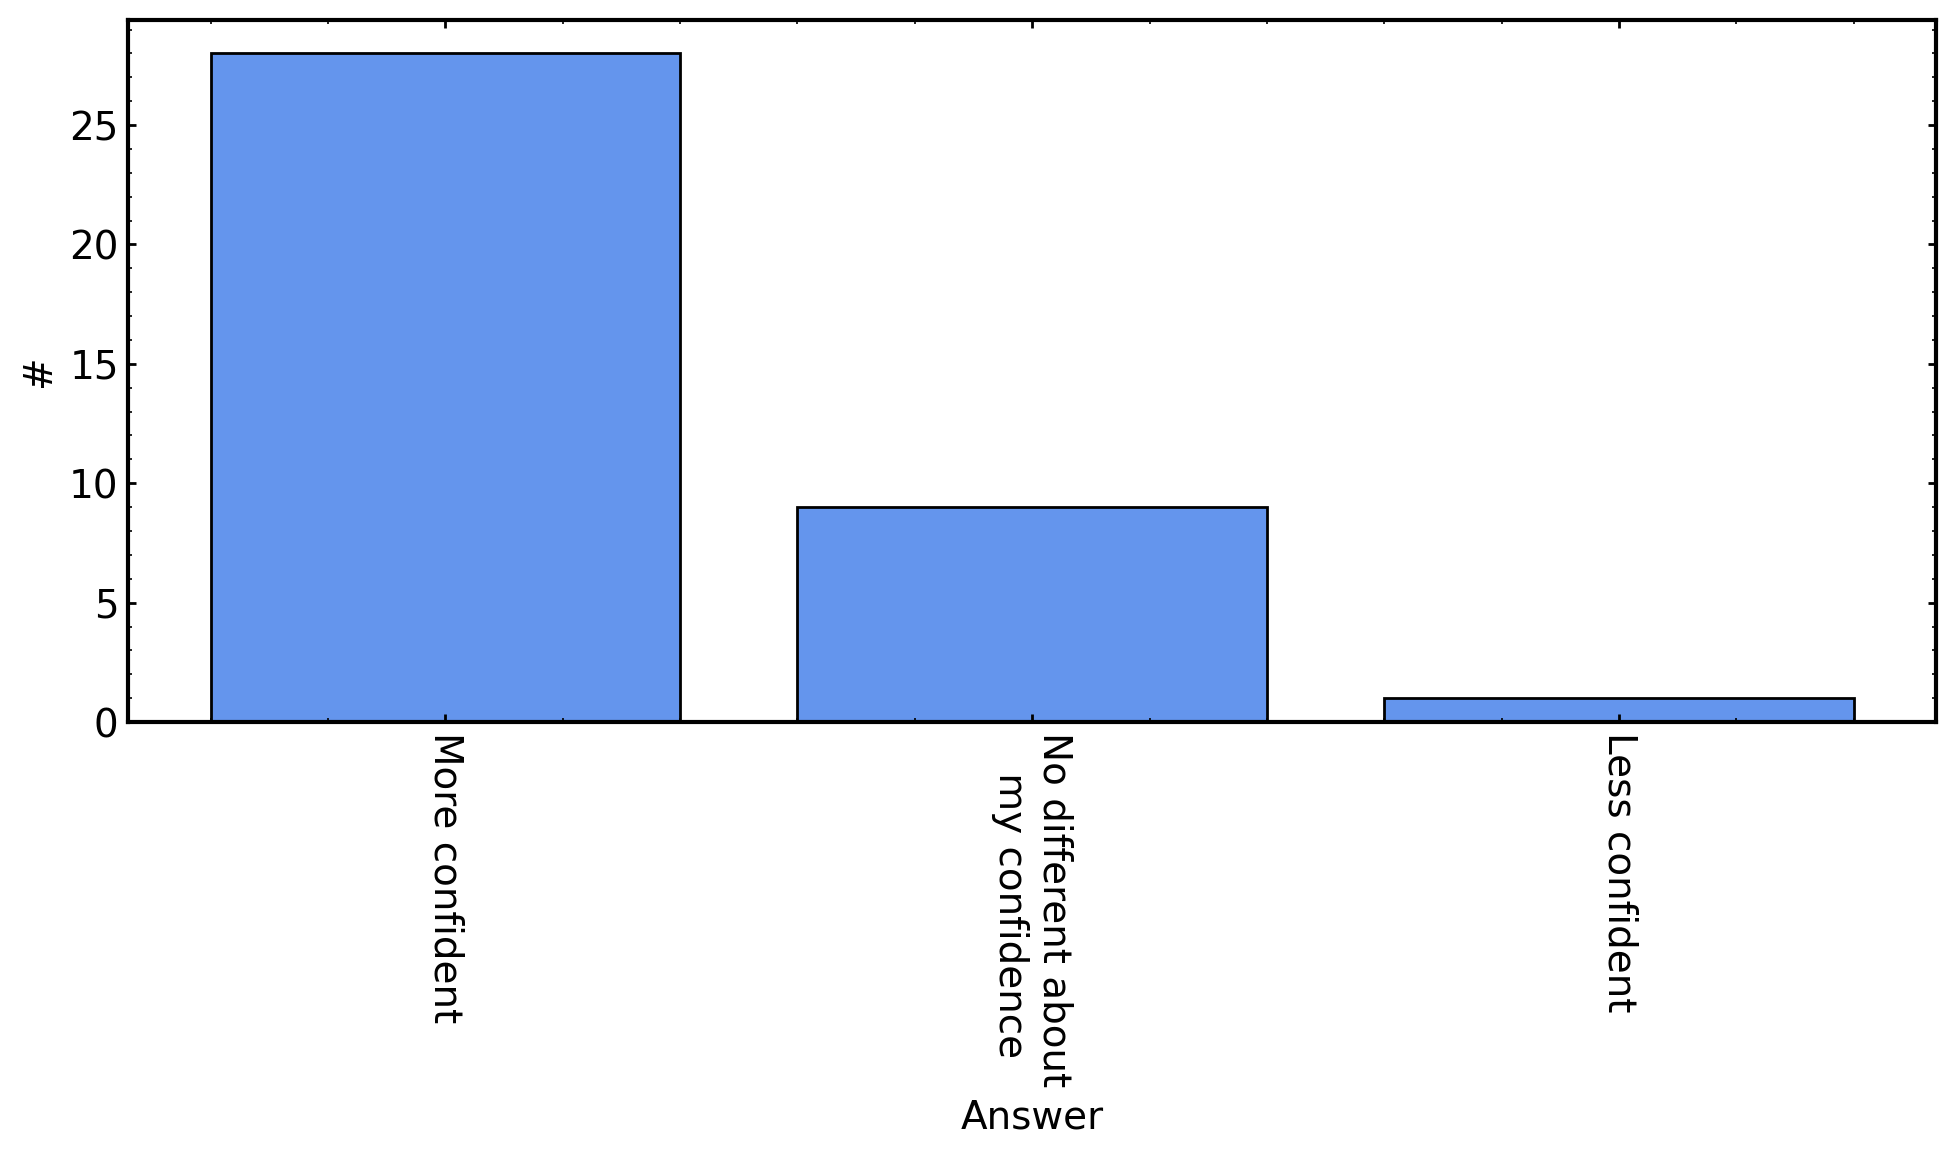

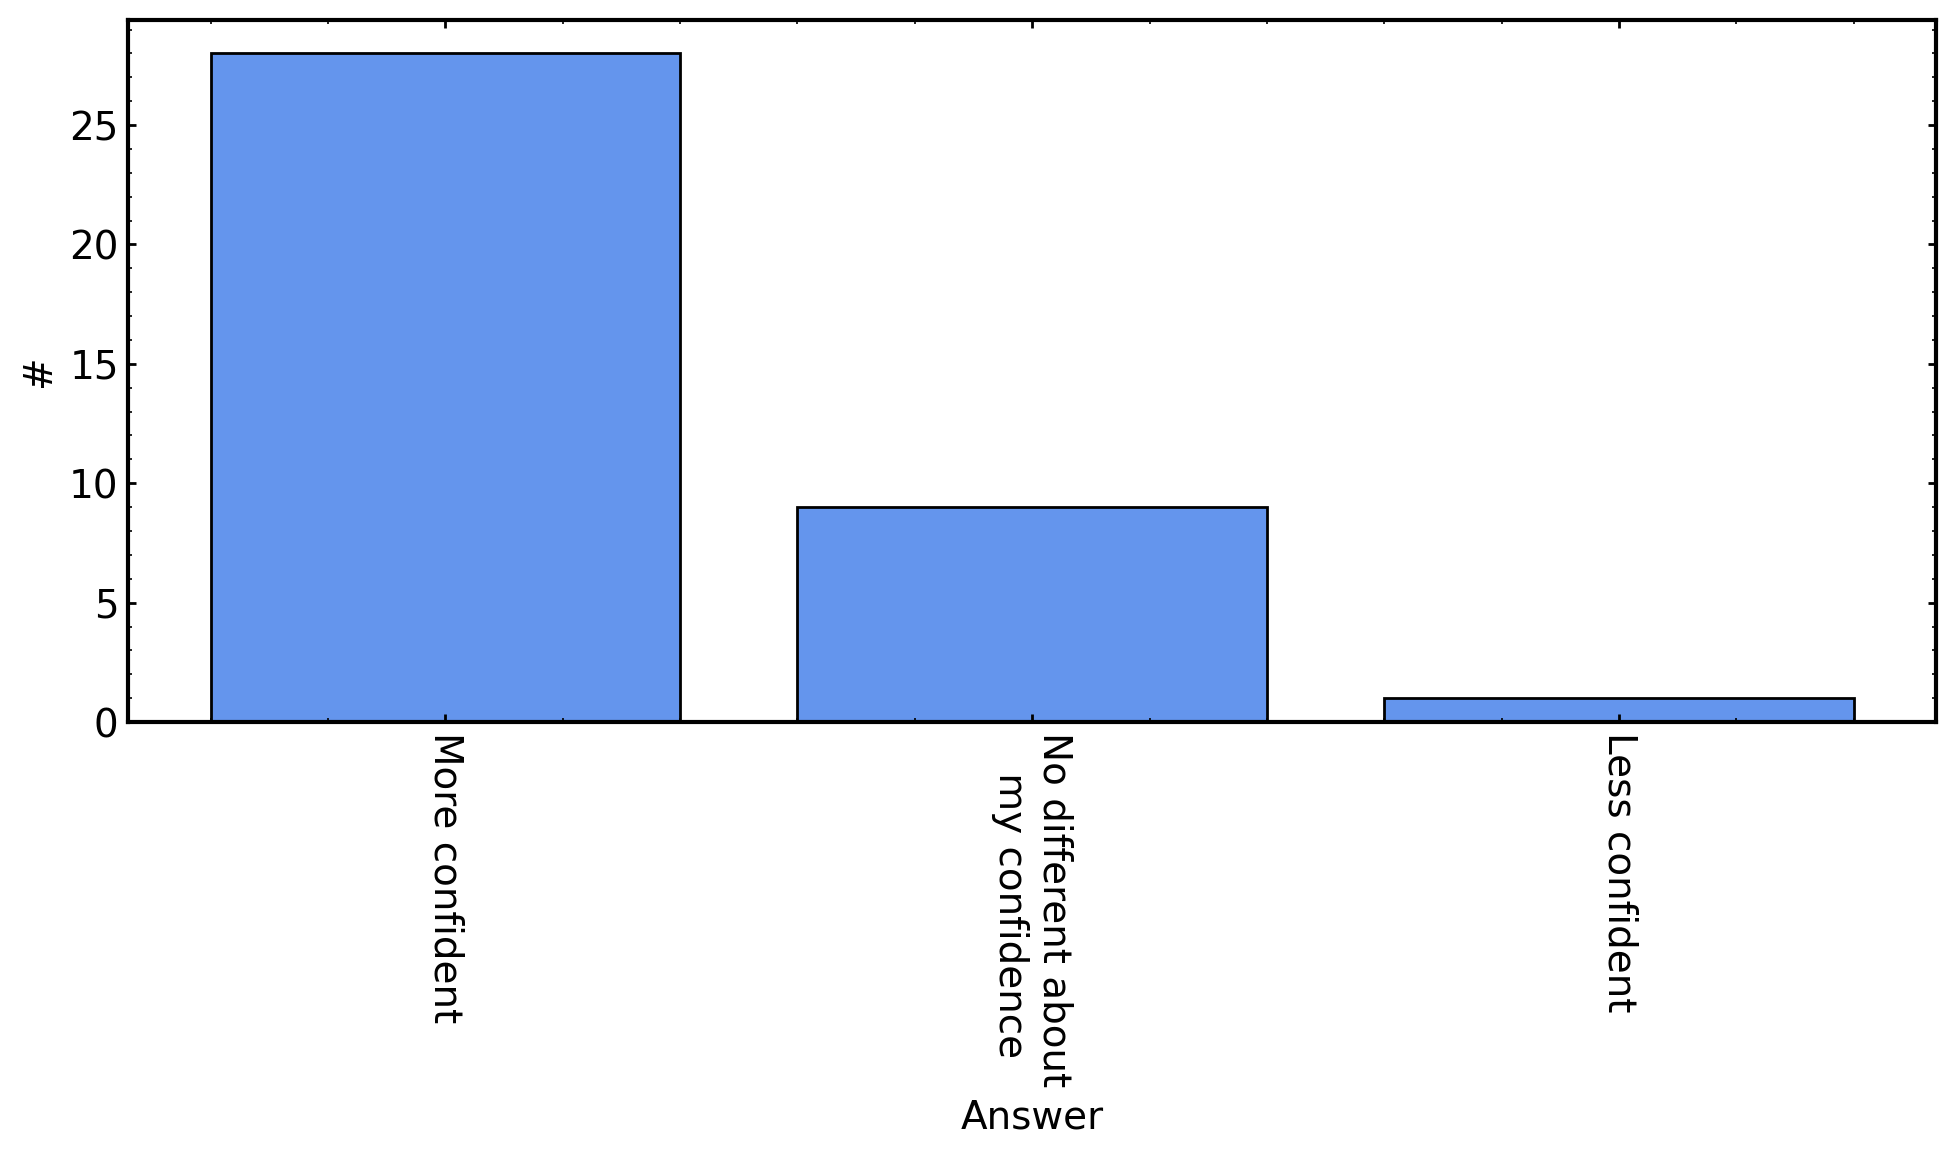

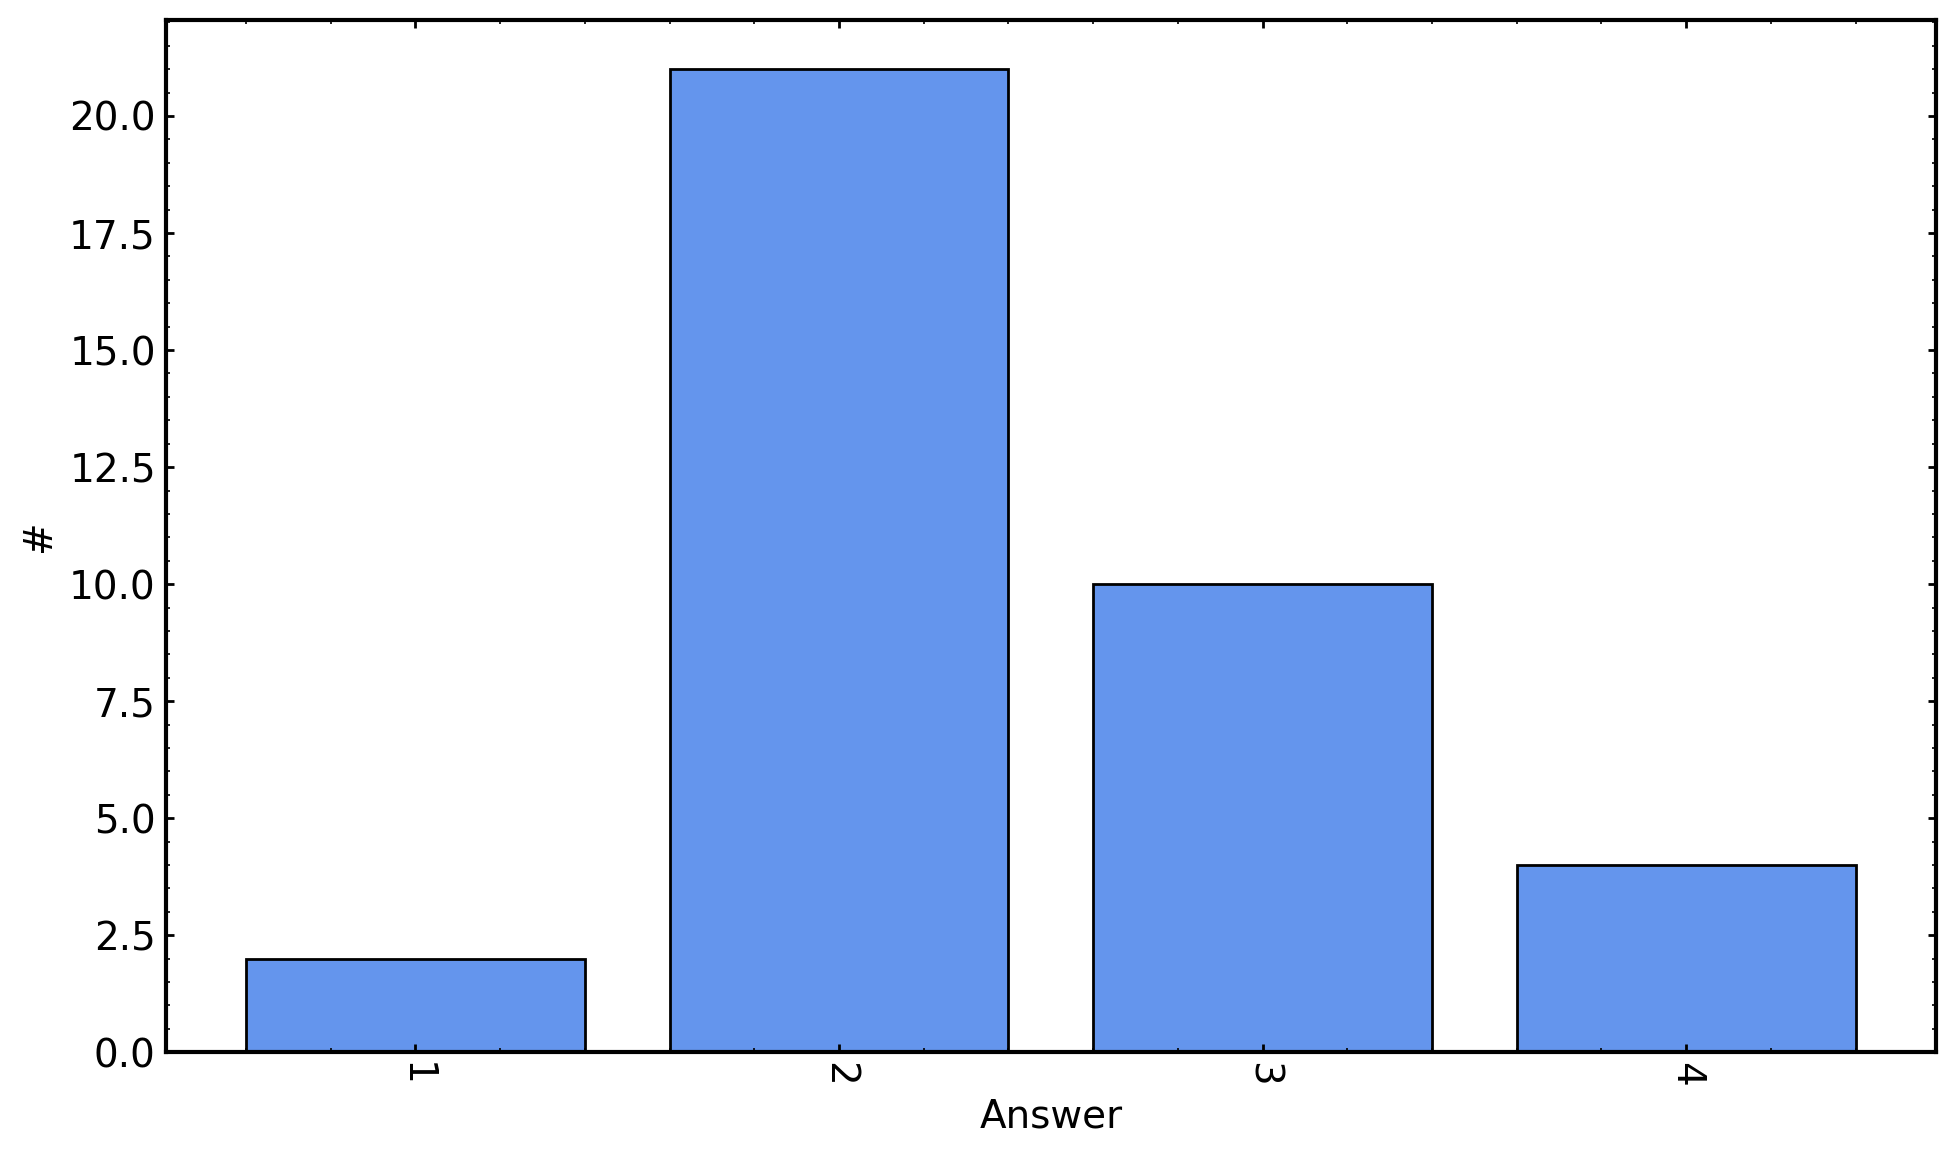

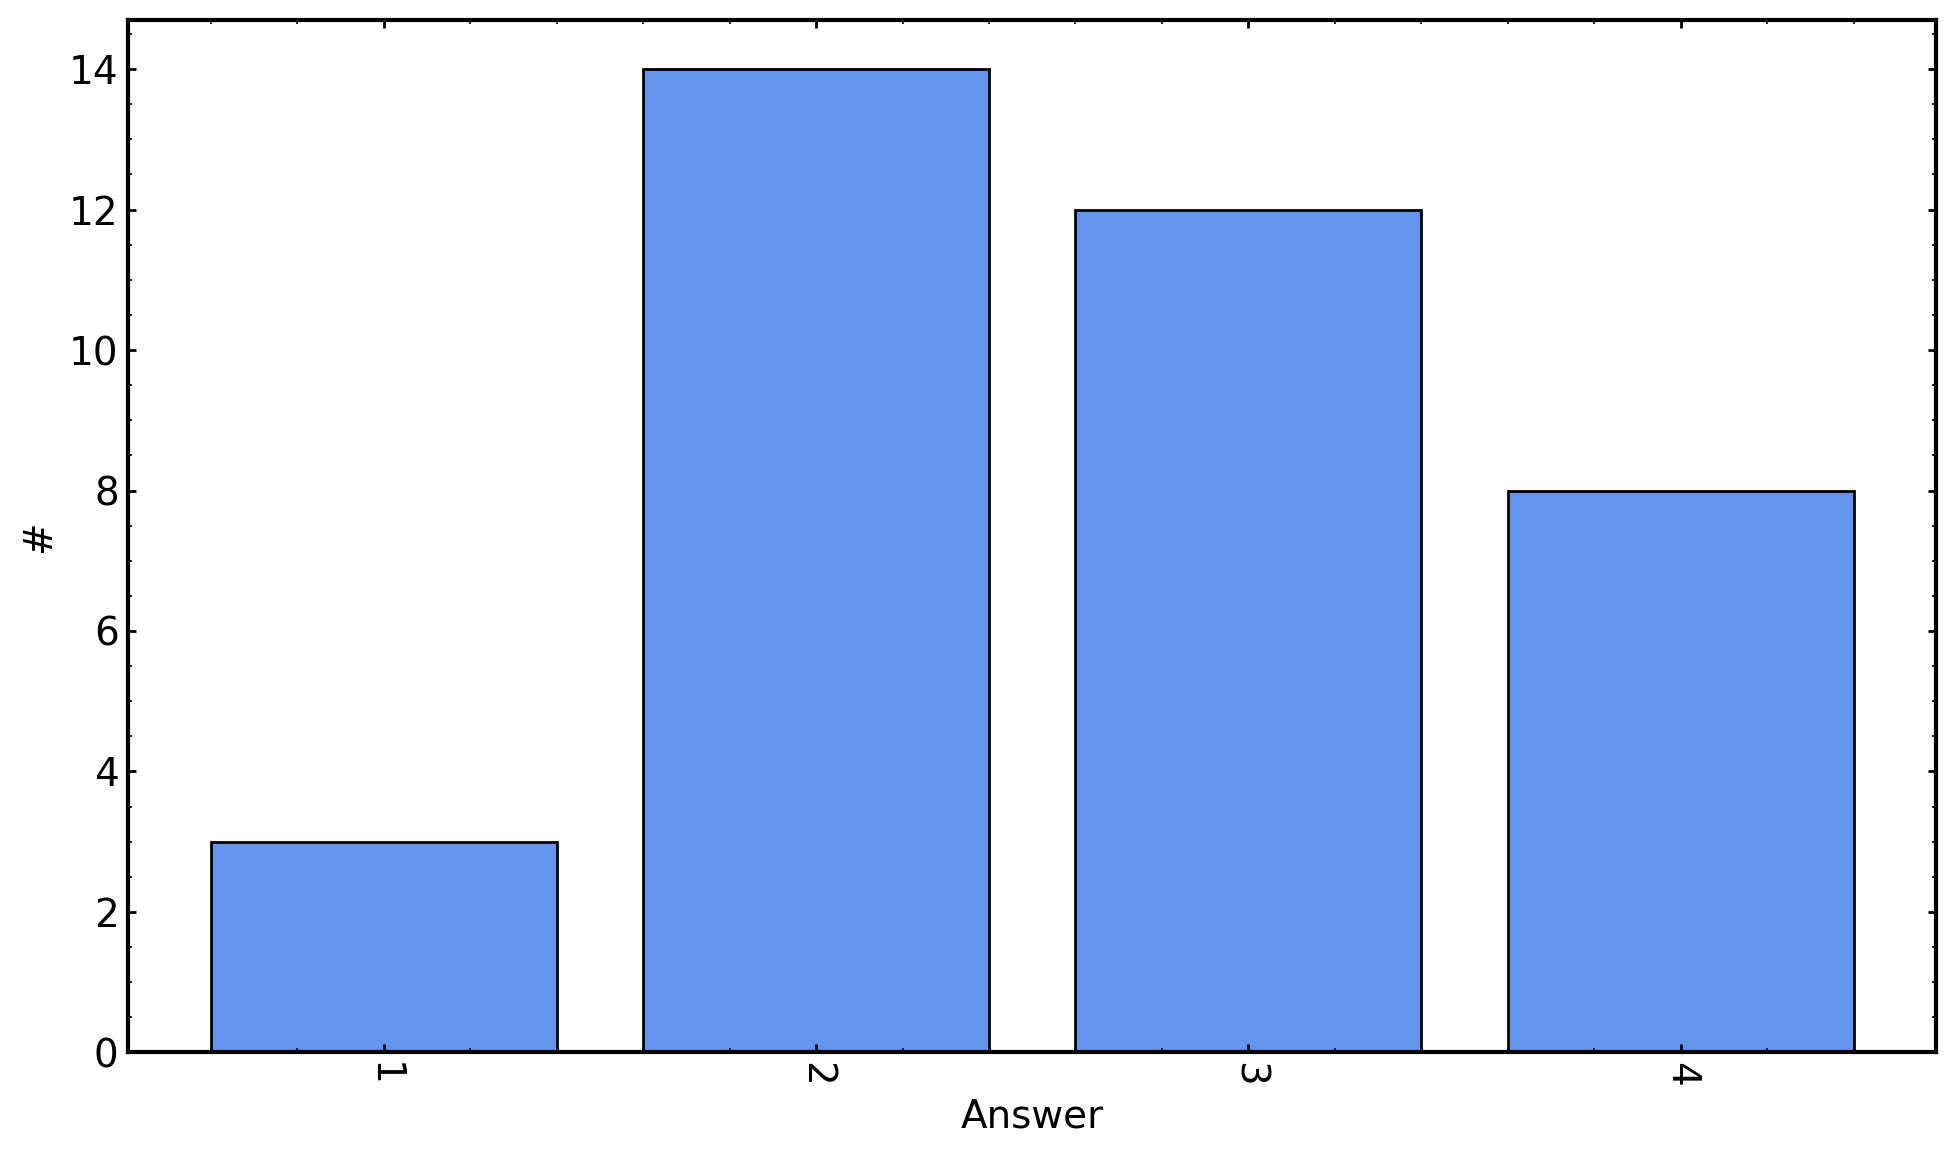

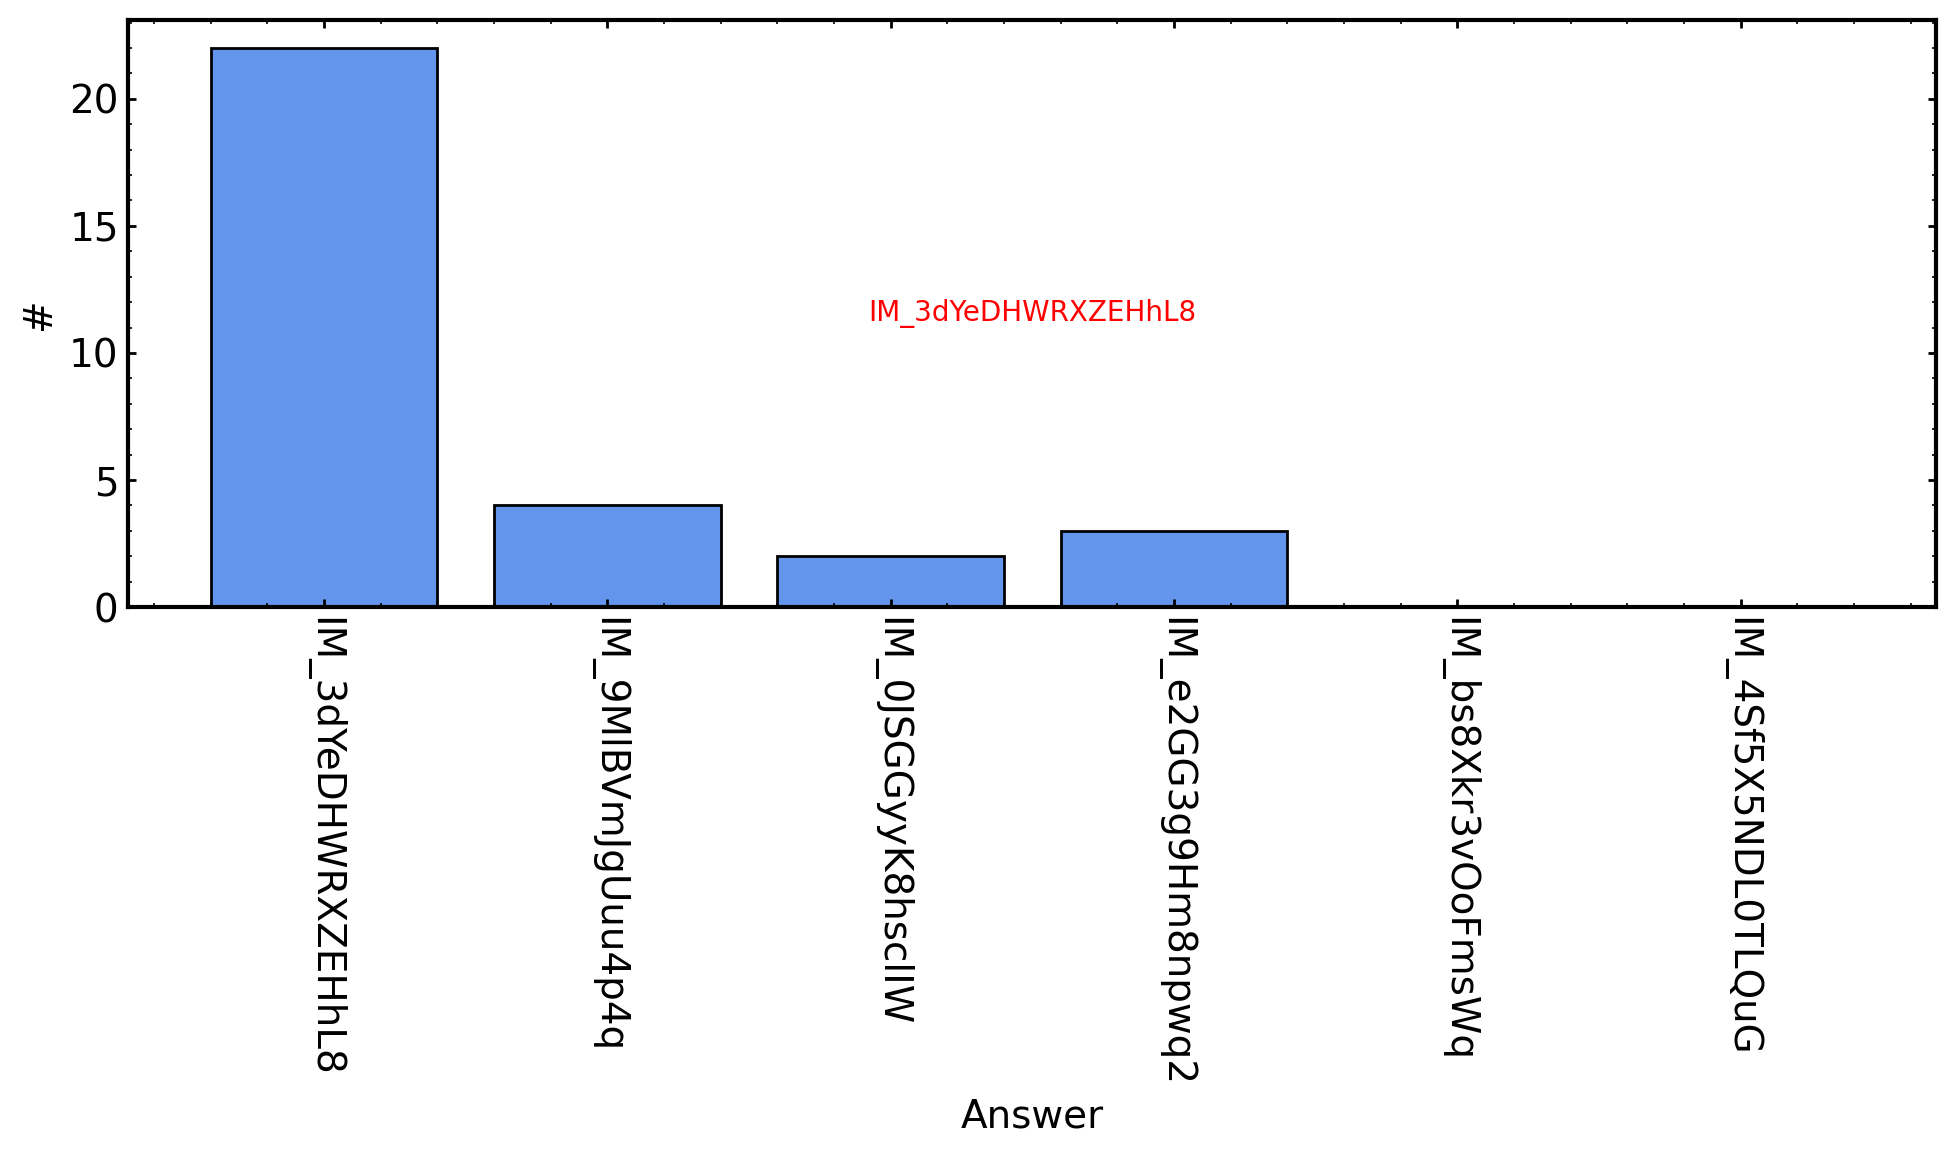

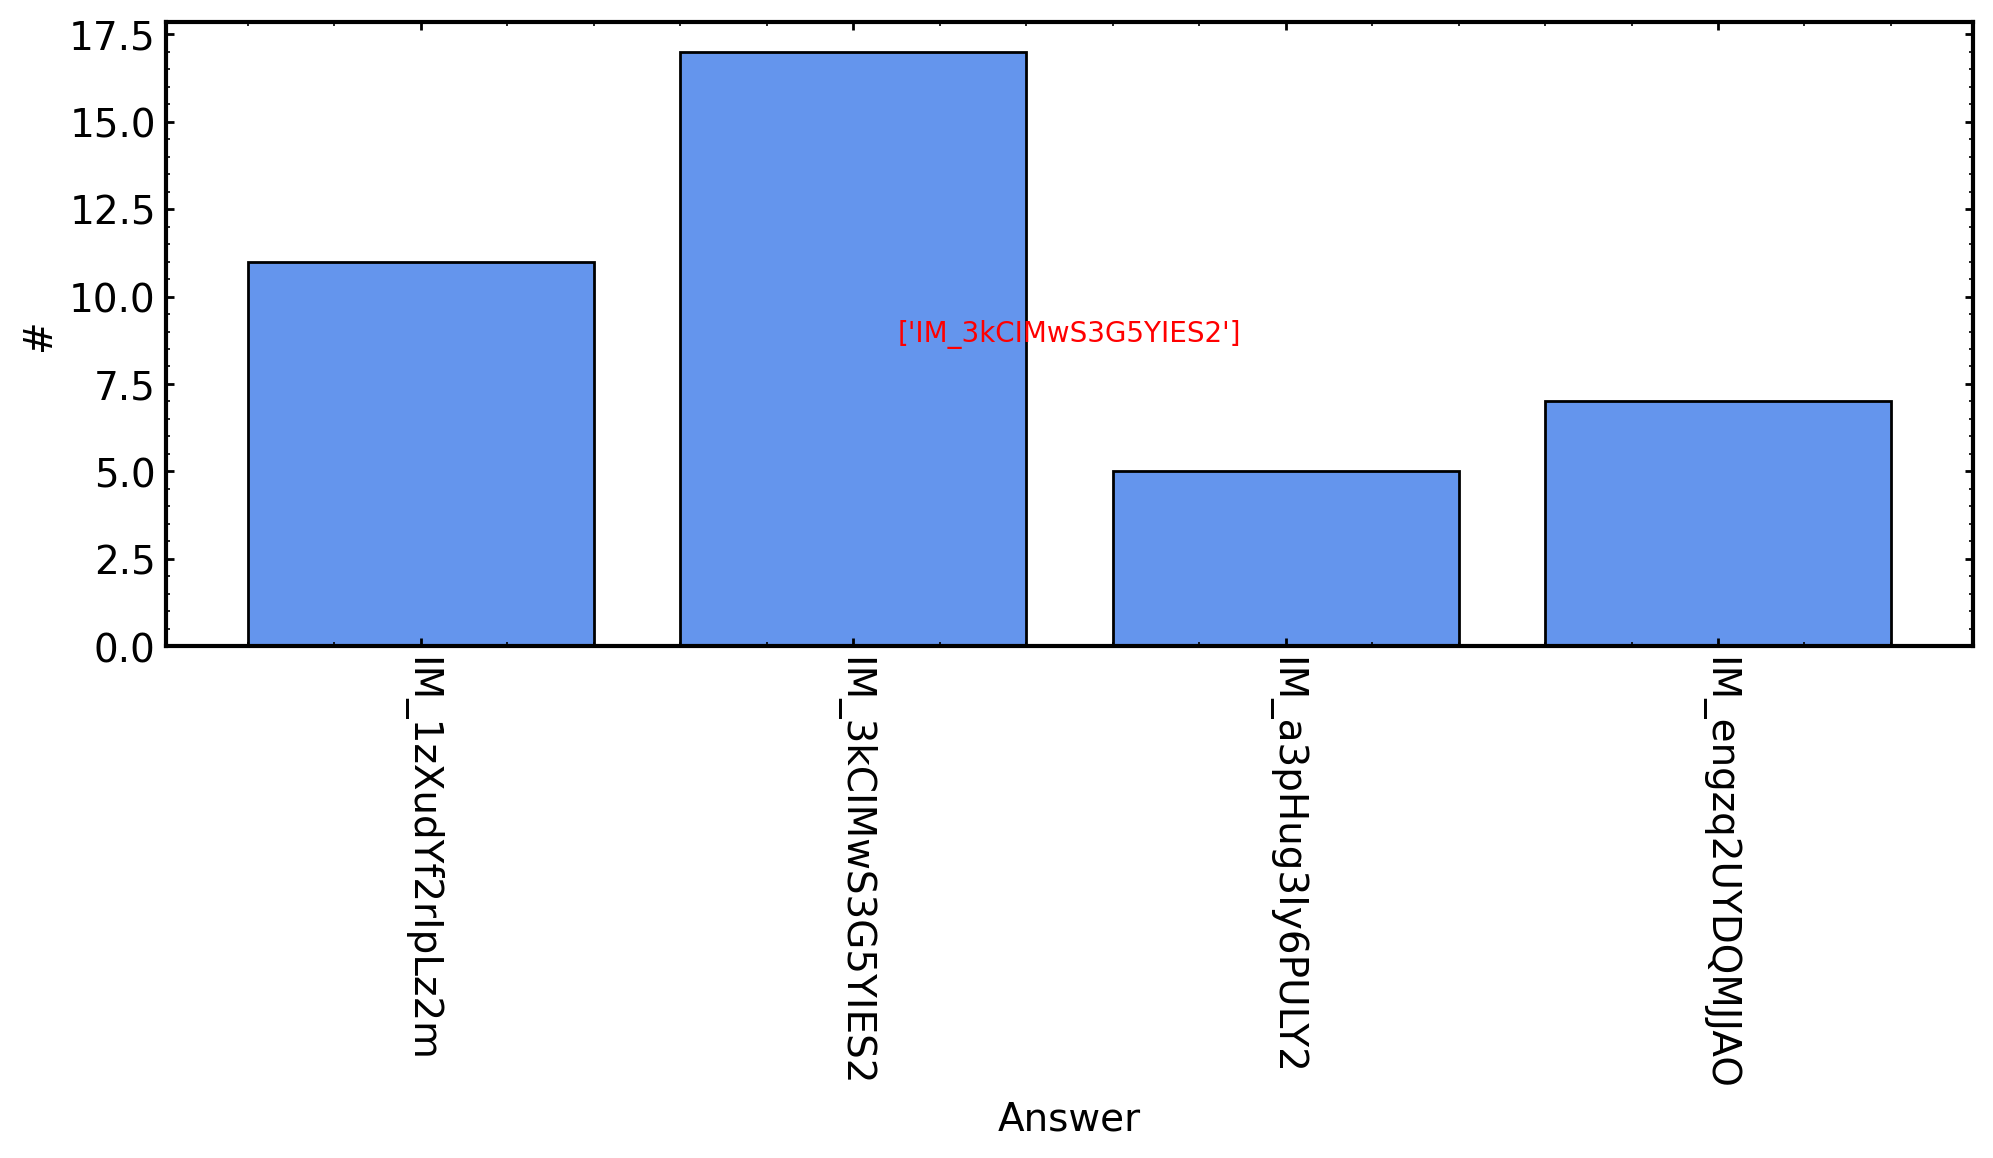

In [154]:
questions_to_display = list(ques_meta.keys())

questions_shown = []

html = """
<!DOCTYPE HTML>
<html>
	<head>
		<title>Data Summary</title>
		<meta charset="utf-8" />
		<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no" />
	</head>
    <body>
"""

def compute_hist(data, xticklabels):
        
    bins, heights = [], []
    for idx, label in enumerate(xticklabels):
        bins.append(idx+0.5)
        if isinstance(data[0], (float, int)):
            n = sum(v == label for v in data)
        else:
            n = sum(v.strip().lower() == label.strip().lower() for v in data)
        heights.append(n)
    
    return bins, heights

def string_chunks(string, x, c="\n"):
    new = ''
    cnt = 0
    for ch in string:
        if cnt%x==0 and cnt!=0: # checking if cnt is a multiple of x and not 0, we don't want to put star at index 0
            new += c
        cnt += 1
        new += ch
    return new

def histogram_data(data, ax, xticklabels, correct_ans, dtype="single"):
    
    hist_kwargs = dict(color="cornflowerblue", edgecolor="k", align="center")
    
    if dtype == "single":
        data = [d for d in data if d is not None]
        bins, heights = compute_hist(data, xticklabels)
        ax.bar(bins, heights, **hist_kwargs)
    else:
        stacked_data = []
        for v in data:
            if not isinstance(v, list) and pd.isna(v): continue
            stacked_data += list(v)
        bins, heights = compute_hist(stacked_data, xticklabels)
        ax.bar(bins, heights, **hist_kwargs)
    
    ax.set_xlabel("Answer")
    ax.set_ylabel("#")
    
    ax.tick_params(axis='x', labelrotation=-90)
    
    ax.set_xticks(bins)
    
    labels_to_plot = []
    for label in xticklabels:
        if len(str(label)) > 18:
            labels_to_plot.append(string_chunks(label, 18))
        else:
            labels_to_plot.append(label)
        
    ax.set_xticklabels(labels_to_plot)
        
    ax.text(
        0.5, 0.5, 
        correct_ans,
        horizontalalignment='center',
        verticalalignment='center',
        transform = ax.transAxes,
        color = "r",
        fontsize=10
    )

idx = 0
for q in questions_to_display:
    
    if q in questions_shown: continue
    
    data = datadict[q]
    
    if data["options"] is None: continue
    
    if data['question'] == "netid":
        questions_shown.append(q)
        continue # we don't want to plot these
    
    dtype = "multiple" if data["multiple"] else "single"
    
    if data["match"] is not None:
        post_data = datadict[data["match"]]
        pre_data = data
        questions_shown.append(data["match"])
        
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6), sharey=True)
        
        histogram_data(pre_data["data"], ax1, pre_data["options"], pre_data["correct_answer"], dtype=dtype)
        histogram_data(post_data["data"], ax2, post_data["options"], post_data["correct_answer"], dtype=dtype)
        
        ax1.set_title("Pre-Questionnaire Answer")
        ax2.set_title("Post-Questionnaire Answer")
        
    else:
    
        fig, ax = plt.subplots(figsize=(10,6))
        histogram_data(data["data"], ax, data["options"], data["correct_answer"], dtype=dtype)
    
        questions_shown.append(q)
    
    figpath = f"imgs/{q}.png"
    
    fig.savefig(figpath)
    
    html += f"<h1>({idx}) {data['question']}</h1>"
    html += f" <img src='{figpath}'>"
    html += "<br>"
    
    idx += 1
    
html += """
</body>
</html>
"""

with open("summary-plots.html", "w") as f:
    f.write(html)